## LPP - zadania rekrutacyjne na stanowisko Data Analyst – Marketing Science w marce Reserved - zadanie 1

**Cel projektu: Przeprowadzenie jakościowej analizy danych zbioru danych "taxi_dane.xlsx" dotyczącego podróży taksówką w celu wydobycia z niego jak największej ilości informacji na jeo temat.**

**Uwaga: Komórki typu Markdown (te, które nie zawierają kodu), mają mały rozmiar fontu, więc łatwo je przegapić w trakcie przeglądania tego pliku.**

### Etap importowania bibliotek, zmieniania ustawień pliku, definiowania potrzebnych reguralnie używanych funkcji i wczytania danych.

In [3]:
# Wczytanie potrzebnych bibliotek.

# Standardowe biblioteki do analizy danych.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteki pomagające w znalezieniu zależności między zmiennymi zbioru danych.
from itertools import combinations
from scipy.stats import chi2_contingency
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [4]:
# Zmienienie ustawień tabel oraz ilości wyświetlanych cyfr po przecinku w tabeli.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# Komórka na reguralnie używane w tym pliku funkcje. Została ona utworzona, aby owe funkcje trzymać w jednym miejscu.

# Funkcja do wyświetlania pierwszych dziesięciu i ostatnich dziesięciu wierszy zbioru danych "taxi_dane.xlsx" oraz do wyświetlania typów danych wszystkich zmiennych tego zbioru.
def dfhead10_dftail10_dftypes(df):
    df_concat_dfhead10_dftail10 = pd.concat([df.head(10), df.tail(10)])
    
    column_types = pd.DataFrame(df.dtypes, columns=['Type']).T
    column_types.columns = df.columns
    column_types.index = ['Column types']
    
    df_with_column_types = pd.concat([column_types, df_concat_dfhead10_dftail10])
    
    return df_with_column_types

# Funkcja do wyświetlania podstawowych informacji o zbiorze danych "taxi_dane.xlsx" oraz do wypisywania liczby wierszy, kolumn i zdupikowanych wierszy tego zbioru.
def dfinfo_extra(df):
    df.info()
    print("\n" + f"Liczba wierszy: {df.shape[0]}")
    print(f"Liczba kolumn: {df.shape[1]}")
    print(f"Liczba zduplikowanych wierszy: {df.duplicated().sum()}")

# Funkcja do pozyskiwania nazw wszystkich zmiennych, numerycznych zmiennych i kategorycznych zmiennych zbioru danych "taxi_dane.xlsx".
def get_columns_name(df):
    all_columns_name = df.columns.tolist()
    numeric_columns_name = df.select_dtypes(include=['number']).columns.tolist()
    category_columns_name = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return all_columns_name, numeric_columns_name, category_columns_name

# Funkcja do wyświetlania zestawienia podstawowych statystyk opisowych zmiennych numerycznych zbioru danych "taxi_dane.xlsx". Do tych statystyk funkcja dodaje medianę, dominantę i współczynnik zmienności.
def describe_extra(df):
    columns_name = get_columns_name(df)
    
    describe = df.describe(percentiles = [0.01, 0.05, 0.10, 0.25, 0.40, 0.50, 0.60, 0.75, 0.90, 0.95, 0.99]).T
    describe.insert(loc=describe.columns.get_loc('mean') + 1, column='median', value=df[columns_name[1]].median()) # Dodanie do polecenia "describe" mediany. Wiem, że 50. percentyl, który też jest wyświetlany przez to polecenie to mediana.
    describe.insert(loc=describe.columns.get_loc('median') + 1, column='mode', value=df[columns_name[1]].mode().iloc[0])
    describe.insert(loc=describe.columns.get_loc('std') + 1, column='wsp_zmien', value=describe["std"] / describe["mean"])
    
    return describe

# Funkcja do wyświetlania zestawienia zawierającego typy zmiennych zbioru danych "taxi_dane.xlsx" oraz ilość brakujących, unikatowych i wszystkich niepustych wartości tych zmiennych.
def missing_unique_summary(df):
    df_missing_unique_summary = pd.DataFrame(df.dtypes, columns=['dtype'])
    df_missing_unique_summary['missing [#]'] = df.isna().sum()
    df_missing_unique_summary['missing [%]'] = df.isna().sum()/len(df)*100
    df_missing_unique_summary['unique'] = df.nunique().values
    df_missing_unique_summary['non unique'] = df.count().values - df.nunique().values
    df_missing_unique_summary['count'] = df.count().values
    
    return df_missing_unique_summary

In [6]:
# Wczytanie zbioru danych "taxi_dane.xlsx".
df = pd.read_excel("taxi_dane.xlsx")

### Wstępna eksploracja danych całego zbioru danych "taxi_dane.xlsx".
Poniżej, wydobywając kolejne informacje na temat zbioru danych "taxi_dane.xlsx", pojawiać się będzie informacja, jakie decyzje podjąłem w związku z modyfikacją tego zbioru oraz o sposobach jego dalszej analizy.

Ze względu na ograniczony czas, nie opisałem jednak w tym pliku każdej wydobytej informacji lub dostrzeżonej obserwacji. Skupiłem się tylko na tych, które subiektywnie uznałem za warte bardziej szczegółowego opisania.

In [8]:
# Wyświetlenie pierwszych dziesięciu i ostatnich dziesięciu wierszy zbioru danych "taxi_dane.xlsx".
# Wyświetlenie typów danych wszystkich zmiennych tego zbioru.
dfhead10_dftail10_dftypes(df)

unique_key  \
Column types                                    object   
0             b57de4fbd42a4fcdfac294083ad896f9b3b19e30   
1             7e0b8a1d91467a8b6c38503812ccf9ceaf81ae46   
2             6f461021d891c897195a602bb6d0bc282f7cff30   
3             ad92e39b524db2e5ca7e54df5db96d806261ed66   
4             baf5ef44846907d5f0af6f0eb17ae25c784a80c0   
5             eebe5730949b9477357151263c251d5d78396dd9   
6             a3e213e5ba04c983b61fc75c0e9b38678354f9e0   
7             dff0ba469903f3460a6f3a2708e13ff38c92b7b6   
8             eadb66356daf65819327caf9edcd2ca949ce5d58   
9             5aedbf2f270dff78b4160f944d72e7e2521b3f14   
99990         dccbc542a9ede9d2db8d9e8224778be5203dbcb7   
99991         e1edd13a7bffe549301b776f6e35530dc51ac8f3   
99992         ef216857b44b2aa256cdf62aa3697310f513f413   
99993         996c877ed3d8a723e1d92ffe5888128a77d45e76   
99994         92e618254ce9c5a6fdc350ff711d24493c9467da   
99995         5183ccee3fe7ce7614c051bce716cf77d65b6645   
99996         c98c6397a75a6c8f3fc572b7248acf76dafb6553   
99997         f69e05f976895f0f63ca044416bb6b0dfb31aa25   
99998         6006fb1785695d4e7ddfa999a617f39155062d21   
99999         3e396ce7ab1739ddc94ba9293a1983558e2ebc77   

                                                        taxi_id  \
Column types                                             object   
0             1a0918b9bfea038d074d533672fa8d2a32a9b2628fbb34...   
1             2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...   
2             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...   
3             fc662712fcee7cc17c53c79bb57f09d0a612440700aa67...   
4             873bacf70099d6c3eb461ab1946fcc8b47cfc95fe78c3b...   
5             b103a8eb64ada2139668ccbde9c39af73dcf878f25f561...   
6             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...   
7             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...   
8             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...   
9             6387cede3d04d6fc99bcb37707880b3c8043f9e7284bfc...   
99990         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...   
99991         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...   
99992         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...   
99993         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...   
99994         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...   
99995         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...   
99996         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...   
99997         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...   
99998         eb0aa1f0dd78747ba0688bc786b87e037ed7bd33ecc4e1...   
99999         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...   

                 trip_start_timestamp       trip_end_timestamp trip_seconds  \
Column types                   object                   object      float64   
0             2013-10-01 00:00:00 UTC  2013-10-01 00:30:00 UTC     1800.000   
1             2013-10-01 00:00:00 UTC  2013-10-01 00:15:00 UTC      900.000   
2             2013-10-01 00:15:00 UTC  2013-10-01 00:30:00 UTC      900.000   
3             2013-10-01 00:15:00 UTC  2013-10-01 00:30:00 UTC     1620.000   
4             2013-10-01 00:30:00 UTC  2013-10-01 01:00:00 UTC     2220.000   
5             2013-10-01 00:30:00 UTC  2013-10-01 00:30:00 UTC      600.000   
6             2013-10-01 01:00:00 UTC  2013-10-01 01:00:00 UTC       60.000   
7             2013-10-01 01:00:00 UTC  2013-10-01 01:00:00 UTC      480.000   
8             2013-10-01 01:00:00 UTC  2013-10-01 01:00:00 UTC      360.000   
9             2013-10-01 01:00:00 UTC  2013-10-01 01:15:00 UTC      540.000   
99990         2019-03-28 16:00:00 UTC  2019-03-28 16:15:00 UTC      840.000   
99991         2019-03-28 16:15:00 UTC  2019-03-28 17:15:00 UTC     3360.000   
99992         2019-03-28 17:30:00 UTC  2019-03-28 17:30:00 UTC      780.000   
99993         2019-03-28 17:45:00 UTC  2019-03-28 17:45:00 UTC      420.000   
99994         2019-03-28 18:

Wyjaśnienie tego jak rozumiem zmienne zbioru danych "taxi_dane.xlsx":
- unique_key - Zmienna, która stanowi unikatowy klucz każdego wiersza tego zbioru danych. Nie jest mi ona potrzebna do indeksowania, gdyż polecenie "pd.read_excel()" generuje własne indeksy wierszy zbioru danych wpisanego w nawiasach tego polecenia. W związku z tym w poniższej komórce zostanie ona usunięta ze zbioru danych. Dodatkowo wartości tej zmiennej to tylko losowe znaki.
- taxi_id - Identyfikator (ID) taksówki lub taksówkarza. Tej zmiennej nie usunę ze zbioru danych, gdyż zawiera ona 1674 unikatowych wartości (zestawienie ilości unikatowych wartości różnych zmiennych ukazane jest poniżej). To oznacza, że owa zmienna nie służy do inseksowania tego zbioru.
- trip_start_timestamp - Czas, w którym klient wsiadł do taksówki i rozpoczął się przejazd.
- trip_end_timestamp - Czas, w którym przejazd się zakończył i klient wysiadł z taksówki.
- trip_seconds - Czas trwania przejazdu taksówkarza z klientem [sekundy].
- trip_miles - Dystans przejazdu taksówkarza z klientem [mile]. 
- pickup_census_tract - Jest to zapewne kod obszaru startowego, w którym taksówkarz odebrał klienta.
- dropoff_census_tract - Jest to zapewne kod obszaru docelowego, w którym klient wysiadł z taksówki.
- pickup_community_area - Zmienna kategoryczna, która stanowi numer/nazwę regionu, z której klient został odebrany przez taksówkarza.
- dropoff_community_area - Zmienna kategoryczna, która stanowi numer/nazwę regionu, w której klient wysiadł z taksówki.
- fare - Taryfa, podstawowa opłata, którą zapłacił klient za przewóz taksówką. Owa opłata jest zazwyczaj obliczana na podstawie przejechanego dystansu i czasu trwania przejazdu.
- tips - Napiwek dany taksówkarzowi przez klienta.
- tolls - Opłaty drogowe, które opłacił klient za przejazd płatną infrastukturą (mosty, tunele, autostrady).
- extras - Możliwe, że jakieś dodatkowe opłaty, które poniósł klient, np. za przewóz bagażu, przewozy w godzinach szczytu lub w nocy, rezerwację taksówki.
- trip_total - Całkowita kwota, którą zapłacił klient za przejazd taksówką. Suma zmiennych "fare", "tips", "tolls" i "extras".

Nie jestem pewny, w jakiej walucie zostały zapisane kwoty w kolumnach "fare", "tips", "tolls", "extras" i "trip_total". W związku z tym w dalszej części tego pliku zamiast jednostek pieniężnych używam skrótu "zł".

- payment_type - Metoda płatności klienta za przejazd taksówką.
- company - Nazwa firmy, do której przynależy dany taksówkarz. Wartości tej zmiennej świadczą o tym, że czasem nazwa firmy, do której przynależy taksówkarz, nie jest znana bądź dany taksówkarz nie przynależy do żadnej firmy.
- pickup_latitude - Szerokość geograficzna miejsca odbioru klienta przez taksówkarza.
- pickup_longitude - Wysokość geograficzna miejsca odbioru klienta przez taksówkarza.
- pickup_location - Wysokość i szerokość geograficzna miejsca odbioru klienta przez taksówkarza.
- dropoff_latitude - Szerokość geograficzna miejsca wysiadki klienta z taksówki.
- dropoff_longitude - Wysokość geograficzna miejsca wysiadki klienta z taksówki.
- dropoff_location - Wysokość i szerokość geograficzna miejsca wysiadki klienta z taksówki.
- year - Rok, w którym odbył się dany przejazd taksówkarza z klientem.
- month - Miesiąc, w którym odbył się dany przejazd taksówkarza z klientem.

Moje obserwacje wynikające z przyjrzenia się wyświetlonemu powyżej zbiorowi danych "taxi_dane.xlsx":
1. W tym zbiorze wiele zmiennych ma typ object. Uznałem jednak, że nie będę zmieniał ich typu na category.

2. W celu bardziej obszernej analizy w dalszej części tego pliku, z kolumny "trip_start_timestamp" utworzyłem trzy kolumny. Pierwsza "day" zawiera tylko dzień miesiąca, kiedy klient wsiadł do taksówki i rozpoczął się przejazd. Druga "day_group" grupuje owe dni miesiąca w przdziały, co 6 dni. Trzecia "day_of_week" zawiera nazwę dnia tygodnia, kiedy klient wsiadł do taksówki i rozpoczął się przejazd.

3. W celu łatwiejszej analizy w dalszej części tego pliku, z kolumny "trip_start_timestamp" utworzyłem dwie kolumny. Pierwsza "trip_start_date_15" zawiera datę, kiedy klient wsiadł do taksówki i rozpoczął się przejazd. Druga "trip_start_time_15" zawiera czas, kiedy klient wsiadł do taksówki i rozpoczął się przejazd. Obie te kolumny są typu kategorycznego. Kolumna "trip_start_timestamp" została usunięta. 

4. Podobnie z kolumny "trip_end_timestamp" utworzyłem dwie kolumny. Pierwsza "trip_end_date_15" zawiera datę, kiedy zakończył się przejazd i klient wysiadł z taksówki. Druga "trip_end_time_15" zawiera czas, kiedy zakończył się przejazd i klient wysiadł z taksówki. Obie te kolumny są typu kategorycznego. Kolumna "trip_end_timestamp" została usunięta.

5. Wartości kolumny "trip_start_time_15" są zapisane w przedziale co 15 minut. Utworzyłem zatem na jej podstawie kolumnę "trip_start_time_2h", w której wartości zapisane są w przedziale, co 2 godziny.

6. Podobnie wartości kolumny "trip_end_time_15" są zapisane w przedziale co 15 minut. Utworzyłem zatem na jej podstawie kolumnę "trip_end_time_2h", w której wartości zapisane są w przedziale, co 2 godziny.

7. W celu łatwiejszej interpretacji uzyskanych wyników po przeprowadzonej analizie w dalszej części tego pliku, wartości w kolumnie "trip_miles" przeliczyłem na kilometry i zmieniłem nazwę tej kolumny na "trip_km".

8. Zmienna "year" i "month" mają typ int64. Zmieniłem ich typ na object, aby móc łatwiej przeprowadzić analizę tego zbioru w dalszej części tego pliku.

In [11]:
# Usunięcie ze zbioru danych "taxi_dane.xlsx" kolumny "unique_key".
df_edited = df.drop(columns=["unique_key"])

# Wykonanie podpunktu 2. z powyższej komórki.
df_edited["trip_start_timestamp"] = pd.to_datetime(df_edited["trip_start_timestamp"])
df_edited["day"] = df_edited["trip_start_timestamp"].dt.strftime("%d")

bins = [0, 6, 12, 18, 24, 31]
labels = ["1-6", "7-12", "13-18", "19-24", "25-31"]
df_edited["day_group"] = pd.cut(df_edited["day"].astype(int), bins=bins, labels=labels, right=True).astype(object)

df_edited["day_of_week"] = df_edited["trip_start_timestamp"].dt.day_name()

# Wykonanie podpunktu 3. i 4. z powyższej komórki.
df_edited["trip_end_timestamp"] = pd.to_datetime(df_edited["trip_end_timestamp"])

df_edited["trip_start_date_15"] = df_edited["trip_start_timestamp"].dt.date
df_edited["trip_start_time_15"] = df_edited["trip_start_timestamp"].dt.time
df_edited["trip_end_date_15"] = df_edited["trip_end_timestamp"].dt.date
df_edited["trip_end_time_15"] = df_edited["trip_end_timestamp"].dt.time

df_edited.drop(columns=["trip_start_timestamp", "trip_end_timestamp"], inplace=True)

# Wykonanie podpunktu 5. i 6. z powyższej komórki.
def inteval_2hour(time):
    hour = time.hour
    interval_start = (hour // 2) * 2
    interval_end = interval_start + 2
    
    return f'{interval_start:02d}:00-{interval_end:02d}:00'

df_edited["trip_start_time_2h"] = df_edited["trip_start_time_15"].apply(inteval_2hour)
df_edited["trip_end_time_2h"] = df_edited["trip_end_time_15"].apply(inteval_2hour)

# Wykonanie podpunktu 7. z powyższej komórki.
df_edited["trip_miles"] = df_edited["trip_miles"] * 1.60934
df_edited.rename(columns={"trip_miles": "trip_km"}, inplace=True)

# Wykonanie podpunktu 8. z powyższej komórki.
df_edited["year"] = df_edited["year"].astype("object")
df_edited["month"] = df_edited["month"].astype("object")

dfhead10_dftail10_dftypes(df_edited)

taxi_id trip_seconds  \
Column types                                             object      float64   
0             1a0918b9bfea038d074d533672fa8d2a32a9b2628fbb34...     1800.000   
1             2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...      900.000   
2             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...      900.000   
3             fc662712fcee7cc17c53c79bb57f09d0a612440700aa67...     1620.000   
4             873bacf70099d6c3eb461ab1946fcc8b47cfc95fe78c3b...     2220.000   
5             b103a8eb64ada2139668ccbde9c39af73dcf878f25f561...      600.000   
6             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...       60.000   
7             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...      480.000   
8             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...      360.000   
9             6387cede3d04d6fc99bcb37707880b3c8043f9e7284bfc...      540.000   
99990         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      840.000   
99991         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     3360.000   
99992         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      780.000   
99993         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      420.000   
99994         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      600.000   
99995         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1320.000   
99996         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1200.000   
99997         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...      445.000   
99998         eb0aa1f0dd78747ba0688bc786b87e037ed7bd33ecc4e1...      240.000   
99999         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...      839.000   

              trip_km pickup_census_tract dropoff_census_tract  \
Column types  float64             float64              float64   
0               2.398                 NaN                  NaN   
1              12.875                 NaN                  NaN   
2              15.450                 NaN                  NaN   
3               0.789     17031081500.000      17031330100.000   
4              52.304                 NaN                  NaN   
5               5.633                 NaN                  NaN   
6               0.161                 NaN                  NaN   
7               8.047                 NaN                  NaN   
8               5.472                 NaN                  NaN   
9               0.386     17031281900.000      17031330100.000   
99990           0.483                 NaN                  NaN   
99991          28.324                 NaN                  NaN   
99992           1.770                 NaN                  NaN   
99993           1.287                 NaN                  NaN   
99994           1.931                 NaN                  NaN   
99995           4.828                 NaN                  NaN   
99996          21.404                 NaN                  NaN   
99997           1.883                 NaN                  NaN   
99998           1.287                 NaN                  NaN   
99999           2.784                 NaN                  NaN   

             pickup_community_area dropoff_community_area     fare     tips  \
Column types                object                 object  float64  float64   
0                               32            out of town   31.450    0.000   
1                               28                      3   18.450    0.000   
2                               32                     41   21.050    0.000   
3                                8                     33   16.250    0.000   
4                                8            out of town   61.450    0.000   
5                                6                      8   10.250    0.000   
6                                3                      3    3.450    0.000   
7                                8                      3   12.450    0.000   
8                                6                  

In [12]:
# Wyświetlenie podstawowych informacji o zbiorze danych "taxi_dane.xlsx".
dfinfo_extra(df_edited)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   taxi_id                 100000 non-null  object 
 1   trip_seconds            99991 non-null   float64
 2   trip_km                 100000 non-null  float64
 3   pickup_census_tract     45868 non-null   float64
 4   dropoff_census_tract    25840 non-null   float64
 5   pickup_community_area   100000 non-null  object 
 6   dropoff_community_area  100000 non-null  object 
 7   fare                    99999 non-null   float64
 8   tips                    99999 non-null   float64
 9   tolls                   88539 non-null   float64
 10  extras                  99999 non-null   float64
 11  trip_total              99999 non-null   float64
 12  payment_type            100000 non-null  object 
 13  company                 100000 non-null  object 
 14  pickup_latitude      

Zbiór danych "taxi_dane.xlsx" zawiera 208 zduplikowanych wierszy. W poniższej komórce usunąłem je ze zbioru.

In [14]:
# Usunięcie ze zbioru danych "taxi_dane.xlsx" zduplikowanych wierszy.
df_edited.drop_duplicates(inplace=True)

# Wyświetlenie podstawowych informacji o zbiorze danych "taxi_dane.xlsx".
dfinfo_extra(df_edited)

<class 'pandas.core.frame.DataFrame'>
Index: 99792 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   taxi_id                 99792 non-null  object 
 1   trip_seconds            99783 non-null  float64
 2   trip_km                 99792 non-null  float64
 3   pickup_census_tract     45807 non-null  float64
 4   dropoff_census_tract    25780 non-null  float64
 5   pickup_community_area   99792 non-null  object 
 6   dropoff_community_area  99792 non-null  object 
 7   fare                    99791 non-null  float64
 8   tips                    99791 non-null  float64
 9   tolls                   88510 non-null  float64
 10  extras                  99791 non-null  float64
 11  trip_total              99791 non-null  float64
 12  payment_type            99792 non-null  object 
 13  company                 99792 non-null  object 
 14  pickup_latitude         88457 non-null  obj

In [15]:
# Wyświetlenie zestawienia zawierającego typy zmiennych zbioru danych "taxi_dane.xlsx" oraz ilość brakujących, unikatowych i wszystkich niepustych wartości dla każdej z tych zmiennych.
missing_unique_summary(df_edited).style.background_gradient(cmap='Purples')

Moje obserwacje wynikające z przyjrzenia się powyższemu zestawieniu:
1. W kolumanch "pickup_census_tract", "dropoff_census_tract", "dropoff_latitude", "dropoff_longitude" i "dropoff_location" brakuje wiele wartości (powyżej 44%). Ze względu na to owe kolumny ze zbioru danych "taxi_dane.xlsx" zostaną usunięte.
2. Ze względu na ograniczony czas moja analiza tego zbioru nie będzie dotyczyła współrzędnych geograficznych odbiorów klientów przez taksówkarzy. Zatem kolumny "pickup_latitude", "pickup_longitude" i "pickup_location" także zostaną usunięte z tego zbioru.
3. Zmienna "tolls", mimo typu danych float64, posiada mało unikatowych wartości. Może po prostu mało klientów musiało opłacić jakieś dodatkowe opłaty drogowe podczas przejazdu taksówką.
4. W kolumnie "tolls" brakuje 11,461% wartości. Mogłyby one zostać uzupełnione np. za pomocą KNNImputer, ale ze względu na to, że nawet wartość 99. percentyla tej zmiennej wynosi 0 (wartości percentyli różnych zmiennych ukazane są poniżej), to owe braki zostaną uzupełnione wartością 0.

In [17]:
# Usunięcie wspomnianych w podpukcie pierwszym i drugim kolumn ze zbioru danych "taxi_dane.xlsx".
df_edited.drop(columns=["pickup_census_tract", "dropoff_census_tract", "dropoff_latitude", "dropoff_longitude", "dropoff_location", "pickup_latitude", "pickup_longitude", "pickup_location"], inplace=True)

# Uzupełnienie brakujących wartości kolumny "tolls" zerami.
df_edited["tolls"].fillna(0, inplace=True)

Ciąg dalszy moich obserwacji wynikających z przyjrzenia się powyższemu zestawieniu:

5. Kolumny "trip_seconds", "fare", tips", "extras" i "trip_total" posiadają kilka brakujących wartości. Ze względu na to w poniższej komórce sprawdziłem, które wiersze mają te brakujące wartości, aby ocenić, czy można je bez żadnych przeciwwskazań usunąć ze zbioru. Uznałem, że nie ma żadnych przeciwwskazań do usunięcia tych wierszy.

In [19]:
df_edited[df_edited.isna().any(axis=1)]

taxi_id  trip_seconds  \
4613   c0591d33660deb744cef729db6457d5a0924498c9ed3bb...           NaN   
6147   6886ad17743bd14735d9bf14bda5d28d5446edaafb75e4...           NaN   
6863   aafe2cb9e0f06a82f8b995a8292190fed97bc4b41f04d3...           NaN   
15973  2130bc5fd239a4e3b304662424fb4cc7db0ca7abf78cc5...      1980.000   
16287  52c3ffa685a3b5ced3d16461deec5a0326086bee3d8f6a...           NaN   
28601  2ff4fad54ffae9d505e55587c34111c2094a0a52873695...           NaN   
44298  2ff4fad54ffae9d505e55587c34111c2094a0a52873695...           NaN   
62513  ba87ebcada16aad3f40ed6699a9e67512f64ef670e2777...           NaN   
73446  2ff4fad54ffae9d505e55587c34111c2094a0a52873695...           NaN   
75019  ef7488a67b3bdf0eaa5355fbfba3dc68a90b9a1f84547f...           NaN   

       trip_km pickup_community_area dropoff_community_area    fare  tips  \
4613     2.092                     6                      7   5.650 0.000   
6147     0.917                    32            out of town   4.450 1.000   
6863     0.917                     8            out of town   4.650 2.000   
15973    4.233                    32            out of town     NaN   NaN   
16287   30.964                    21            out of town 469.050 0.000   
28601    1.110                    32            out of town   5.250 1.000   
44298    1.851                     7            out of town   5.450 2.000   
62513    0.612                    76            out of town  11.650 5.270   
73446    1.352                     7            out of town   4.850 2.000   
75019    4.828                    33                      8  10.050 0.000   

       tolls  extras  trip_total payment_type          company  year month  \
4613   0.000   3.000       8.650         Cash  no company name  2013    10   
6147   0.000   0.500       5.950         Cash  no company name  2013    10   
6863   0.000   1.500       8.150  Credit Card  no company name  2013    10   
15973  0.000     NaN         NaN         Cash  no company name  2013    10   
16287  0.000   0.000     469.050         Cash  no company name  2013    10   
28601  0.000   1.000       7.250  Credit Card  no company name  2013    10   
44298  0.000   1.500       8.950  Credit Card  no company name  2013    11   
62513  0.000  21.500      38.420         Cash  no company name  2013    12   
73446  0.000   1.000       7.850  Credit Card  no company name  2013    12   
75019  0.000   1.000      11.050         Cash  no company name  2013    12   

      day day_group day_of_week trip_start_date_15 trip_start_time_15  \
4613   05       1-6    Saturday         2013-10-05           02:00:00   
6147   06       1-6      Sunday         2013-10-06           10:00:00   
6863   06       1-6      Sunday         2013-10-06           21:45:00   
15973  14     13-18      Monday         2013-10-14           19:30:00   
16287  15     13-18     Tuesday         2013-10-15           08:15:00   
28601  26     25-31    Saturday         2013-10-26           13:45:00   
44298  09      7-12    Saturday         2013-11-09           20:15:00   
62513  02       1-6      Monday         2013-12-02           14:15:00   
73446  14     13-18    Saturday         2013-12-14           18:15:00   
75019  16     13-18      Monday         2013-12-16           00:30:00   

      trip_end_date_15 trip_end_time_15 trip_start_time_2h trip_end_time_2h  
4613        2013-10-05         00:00:00        02:00-04:00      00:00-02:00  
6147        2013-10-06         10:00:00        10:00-12:00      10:00-12:00  
6863        2013-10-06         21:45:00        20:00-22:00      20:00-22:00  
15973       2013-10-14         20:00:00        18:00-20:00      20:00-22:00  
16287       2013-10-15         06:45:00        08:00-10:00      06:00-08:00  
28601       2013-10-26         13:45:00        12:00-14:00      12:00-14:00  
44298       2013-11-09         20:00:00        20:00-22:00      20:00-22:00  
62513       2013-12-02         14:15:00        14:00-16:00      14:00-16:00  
73446       2013-12-1

In [20]:
# Usunięcie ze zbioru danych "taxi_dane.xlsx" powyższych wierszy.
columns_to_check = ["trip_seconds", "fare", "tips", "extras", "trip_total"]
df_edited.dropna(subset=columns_to_check, inplace=True)

# Wyświetlenie zestawienia zawierającego typy zmiennych zbioru danych "taxi_dane.xlsx" oraz ilość brakujących, unikatowych i wszystkich niepustych wartości tych zmiennych.
missing_unique_summary(df_edited).style.background_gradient(cmap='Purples')

In [21]:
# Wyświetlenie występujących w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typów zmiennych i ich liczby wystąpień.
# Wyświetlenie nazw wszystkich zmiennych, numerycznych zmiennych i kategorycznych zmiennych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
print('Występujące w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typy zmiennych i ich liczba wystąpień: ')
print(df_edited.dtypes.value_counts(), "\n")

all_columns_name, numeric_columns_name, categoric_columns_name = get_columns_name(df_edited)
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" wszystkich zmiennych jest łącznie {len(all_columns_name)}, są to: \n{all_columns_name}', '\n')
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych numerycznych jest łącznie {len(numeric_columns_name)}, są to: \n{numeric_columns_name}', '\n')
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych jest łącznie {len(categoric_columns_name)}, są to: \n{categoric_columns_name}')

Występujące w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typy zmiennych i ich liczba wystąpień: 
object     16
float64     7
Name: count, dtype: int64 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" wszystkich zmiennych jest łącznie 23, są to: 
['taxi_id', 'trip_seconds', 'trip_km', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company', 'year', 'month', 'day', 'day_group', 'day_of_week', 'trip_start_date_15', 'trip_start_time_15', 'trip_end_date_15', 'trip_end_time_15', 'trip_start_time_2h', 'trip_end_time_2h'] 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych numerycznych jest łącznie 7, są to: 
['trip_seconds', 'trip_km', 'fare', 'tips', 'tolls', 'extras', 'trip_total'] 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych jest łącznie 16, są to: 
['taxi_id', 'pickup_community_area', 'dropoff_community_area', 'payment_type', 'company', 'year', 'month', 'day', 'day_group', '

In [22]:
# Wyświetlenie zestawienia podstawowych statystyk opisowych zmiennych numerycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
describe_extra(df_edited)

count    mean  median    mode      std  wsp_zmien   min  \
trip_seconds 99782.000 899.210 660.000 540.000 1761.507      1.959 0.000   
trip_km      99782.000   6.795   3.396   0.000   10.436      1.536 0.000   
fare         99782.000  13.803   9.250   0.010   56.813      4.116 0.000   
tips         99782.000   0.918   0.000   0.000    2.422      2.637 0.000   
tolls        99782.000   0.010   0.000   0.000    0.769     80.238 0.000   
extras       99782.000   1.062   0.000   0.000    3.417      3.218 0.000   
trip_total   99782.000  15.793  10.250   0.010   58.011      3.673 0.000   

                1%     5%     10%     25%     40%     50%     60%      75%  \
trip_seconds 0.000 60.000 180.000 420.000 540.000 660.000 780.000 1080.000   
trip_km      0.000  0.064   0.306   1.400   2.575   3.396   4.506    7.709   
fare         0.010  3.250   4.650   6.450   8.050   9.250  10.850   15.250   
tips         0.000  0.000   0.000   0.000   0.000   0.000   0.000    0.000   
tolls        0.000  0.000   0.000   0.000   0.000   0.000   0.000    0.000   
extras       0.000  0.000   0.000   0.000   0.000   0.000   0.000    1.000   
trip_total   0.010  3.250   5.000   7.200   9.050  10.250  12.050   16.600   

                  90%      95%      99%       max  
trip_seconds 1740.000 2280.000 3780.000 74880.000  
trip_km        18.683   27.214   42.648   851.824  
fare           29.250   36.850   57.450  9000.860  
tips            3.000    5.000   10.610    66.000  
tolls           0.000    0.000    0.000    88.500  
extras          2.000    3.000   21.000    90.000  
trip_total     33.850   45.650   75.450  9050.860

Moje obserwacje wynikające z przyjrzenia się powyższemu zestawieniu:
1. "trip_seconds":
   - Średni czas przejazdu taksówkarza z klientem trwał 899.210 sekund (~ 15 minut) - niepodejrzany wynik.
   - Mediana czasu przejazdu taksówkarza z klientem wyniosła 660 sekund (11 minut), co sugeruje, że większość przejazdów trwało krócej niż średni czas przejazdu - niepodejrzany wynik.
   - Najczęściej czas przejazdu taksówkarza z klientem trwał 540 sekund (9 minut) - niepodejrzany wynik.
   - Czas przejazdu taksówkarza z klientem wykazuje zmienność na poziomie 1761.507 sekund (~ 29,358 minuty), co wskazuje na dużą rozpiętość czasów trwania przejazdów. Jednak współczynnik zmienności sugeruje, że jest to wynik wiarygodny i nie powinien budzić podejrzeń.
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, które trwały mniej niż 120 sekund (2 minuty), a tym bardziej mniej niż 60 sekund (1 minitę, 5. percentyl).
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, które trwały 0 sekund (1. percentyl).
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, które trwały więcej niż 1200 sekund (20 minut), a tym bardziej więcej niż 1740 sekund (29 minut, 90. percentyl), jak i więcej niż 2280 sekund (38 minut, 95. percentyl), jak i więcej niż 3780 sekund (63 minuty, 99. percentyl).
   - Warty sprawdzenia jest przypadek przejazdu taksówkarza z klientem, który trwał 74880 sekund (1248 minut).

2. "trip_km":
   - Średni dystans przejazdu taksówkarza z klientem wynosił 6,795 km - niepodejrzany wynik.
   - Mediana dystansów przejazdów taksówkarza z klientem wyniosła 3,396 km, co sugeruje, że większość przejazdów odbyło się na krótszym dystansie niż średni dystans przejazdu - niepodejrzany wynik.
   - Najczęstszym dystansem przejazdu taksówkarza z klientem było 0 km - wynik raczej niepodejrzany, może on wynikać z tego, że dystanse zostały zapisane jako liczby dziesiętne, zatem 0 km bez żadnych miejsc po przecinku wystąpiło najczęściej w kolumnie "trip_km".
   - Dystans przejazdu taksówkarza z klientem wykazuje zmienność na poziomie 10,436 km, co wskazuje na dużą rozpiętość dystansów przejazdów. Jednak współczynnik zmienności sugeruje, że jest to wynik wiarygodny i nie powinien budzić podejrzeń.
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, których dystans wyniósł mniej niż 1 km, a tym bardziej mniej niż 0,306 km (10. percentyl), jak i mniej niż 0,064 km (5. percentyl).
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, których dystans wyniósł 0 km (1. percentyl).
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, których dystans wyniósł więcej niż 25 km, a tym bardziej więcej niż 27,214 km (95. percentyl), jak i więcej niż 42,648 km (99. percentyl).
   - Warty sprawdzenia jest przypadek przejazdu taksówkarza z klientem, którego dystans wyniósł 851,824 km.
  
3. "fare":
   - Średnia taryfa za przejazd taksówkarza z klientem wyniosła 13,803 zł - niepodejrzany wynik.
   - Mediana taryf za przejazd taksówkarza z klientem wyniosła 9,25 zł, co sugeruje, że większość taryf była niższa niż średnia taryfa za przejazd - niepodejrzany wynik.
   - Najczęściej taryfa za przejazd taksówkarza z klientem wynosiła 0,010 zł - wynik raczej niepodejrzany, może on wynikać z tego, że taryfy zostały zapisane jako liczby dziesiętne, zatem żadna kwota częściej nie wystąpiła w kolumnie "fare".
   - Taryfa za przejazd taksówkarza z klientem wykazuje zmienność na poziomie 56,813 zł, co wskazuje na dużą rozpiętość owych taryf. Jednak współczynnik zmienności sugeruje, że jest to wynik wiarygodny i nie powinien budzić podejrzeń.
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, za które taryfa wyniosła mnie niż 5 zł, a tym bardziej mnie niż 4,65 zł (10. percentyl), jak i mniej niż 3,25 zł (5. percentyl), jak i mniej niż 0,01 zł (1. percentyl).
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, za które taryfa wyniosła 0 zł.
   - Warte sprawdzenia są przypadki przejazdów taksówkarza z klientem, za które taryfa wyniosła więcej niż 40 zł, a tym bardziej więcej niż 57,45 zł (99. percentyl).
   - Warty sprawdzenia jest przypadek przejazdu taksówkarza z klientem, za który taryfa wyniosła 9000,86 zł.

4. "tips, "tolls", "extras":
   - W przypadku tych zmiennych to odchylenie standardowe i współczynnik zmienności zmiennej "tolls" są warte sprawdzenia. Wyniki tych statystyk opisowych mogą jednak wynikać z tego, że maksymalna wartość w kolumnie "tolls" wynosi 88,5.
   - Warte sprawdzenia są wartości powyżej 99. percentyla zmiennej "extras".

5. "trip_total":
   - Ze względu na to, że ta zmienna jest sumą "fare", "tips, "tolls" i "extras", moje wnioski na jej temat są podobne do tych, które zawarłem w podpunkcie 3.
  
Ogólne wnioski:
Analiza powyższego zestawienia podstawowych statystyk opisowych zmiennych numerycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx" sugeruje, że większość danych tego zbioru jest wiarygodna. Wystąpiły w nim jednak pewne przypadki skrajne, które wymagają dalszego sprawdzenia. Tymi skrajnymi przypadkami są m.in. przejazdy o zerowym czasie lub dystansie oraz przypadki o wyjątkowo wysokich kosztach przejazdu. Warto je sprawdzić, gdyż mogą one wynikać z błędów w danych lub faktycznie mogą to być specyficzne, rzadkie przypadki. Wartości odchyleń standardowych i percentyli świadczą o tym, że czas trwania, przejechany dystans i koszt przejazdów charakteryzują się dużą zmiennością. Większość przejazdów jest stosunkowo krótka oraz odbywa się bez dodatkowych opłat i napiwków. Każda zmienna ma medianę mniejszą niż średnia, co sugeruje, że ich rozkłady są skośne w prawo. W praktyce oznacza to, że każda z tych zmiennych zawiera kilka wartości wyraźnie większych od pozostałych, co podnosi ich średnią.

#### Eksploracyjna analiza danych (EDA) zmiennych numerycznych zbioru danych "taxi_dane.xlsx".

Poniżej przeprowadziłem eksploracyjną analizę danych (EDA) zmiennych numerycznych zbioru danych "taxi_dane.xlsx". Następnie z otrzymanych wyników wyciągnąłem wnioski.

Ze względu na ograniczony czas, trochę bardziej dokładnie przeanalizowałem w dalszej części tego pliku, tylko zmienną zwiazaną z zarobkiem, czyli "trip_total". Gdybym w pracy otrzymał taki zbiór danych, prawdopodobnie przeanalizowałbym dokładniej większość tych zmiennych.

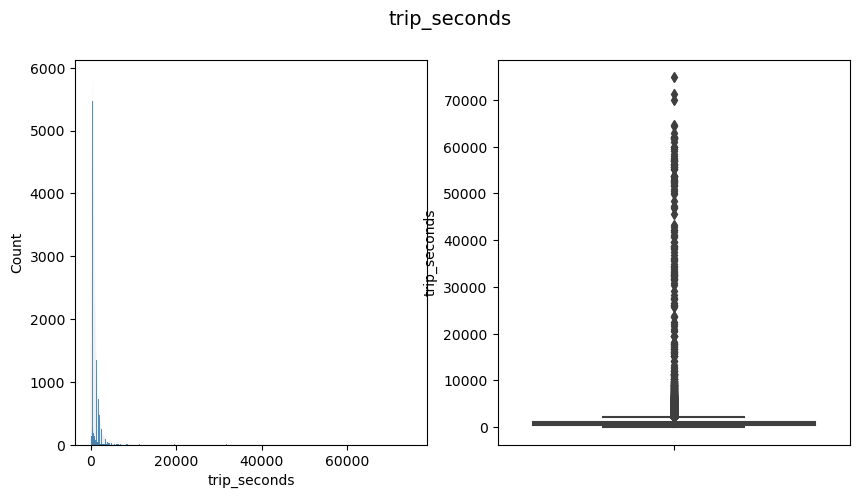

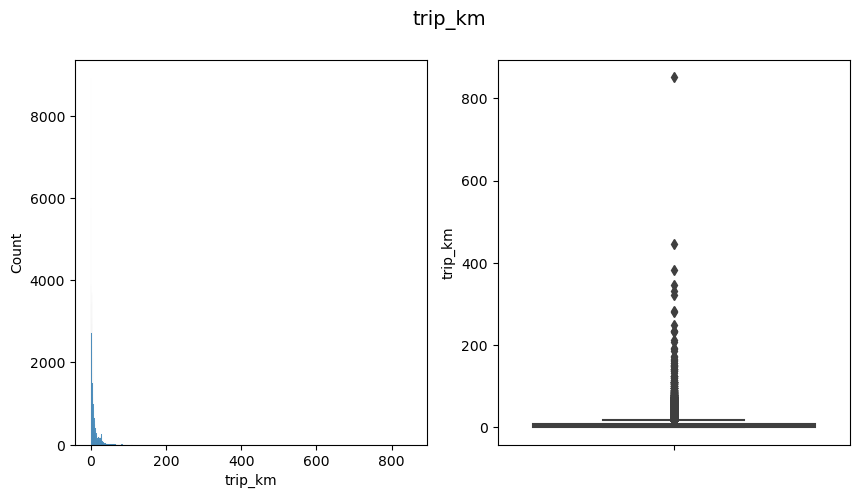

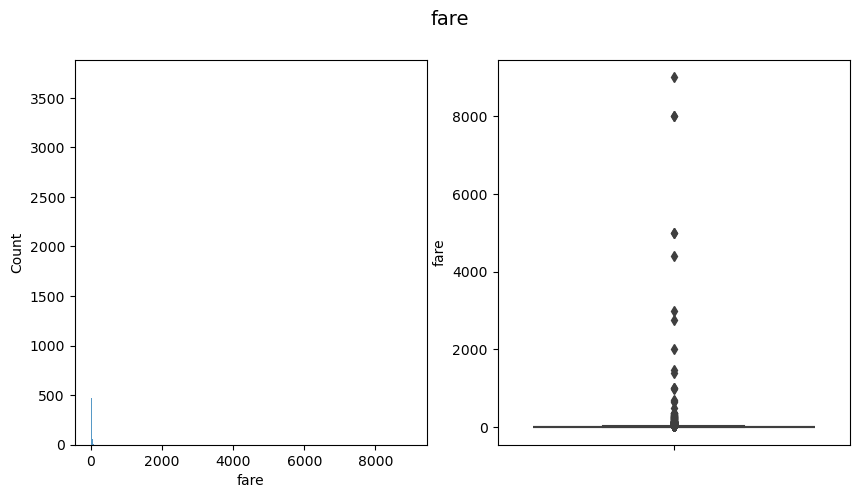

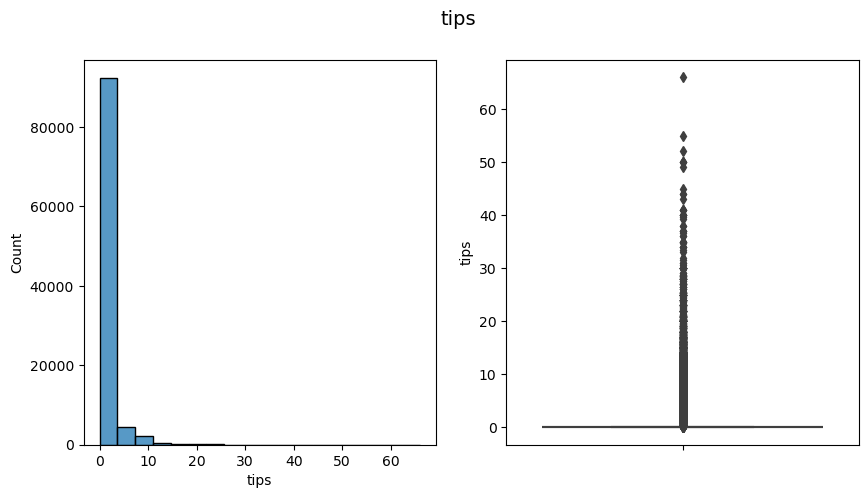

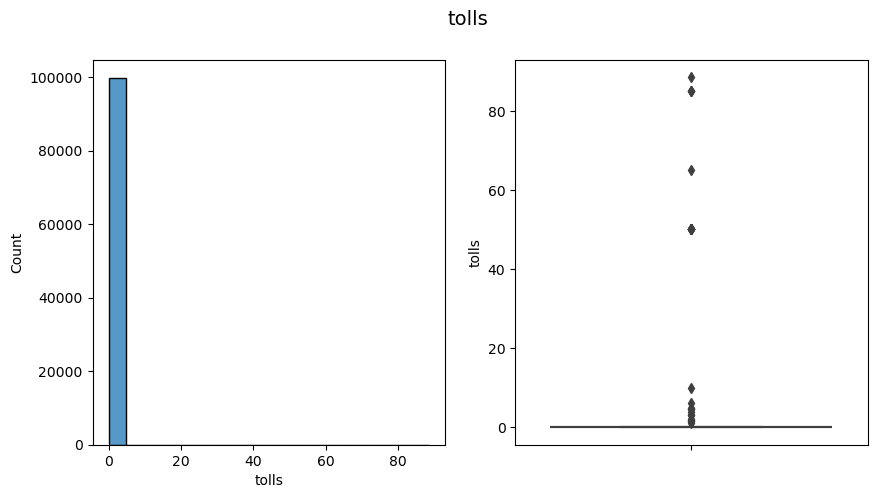

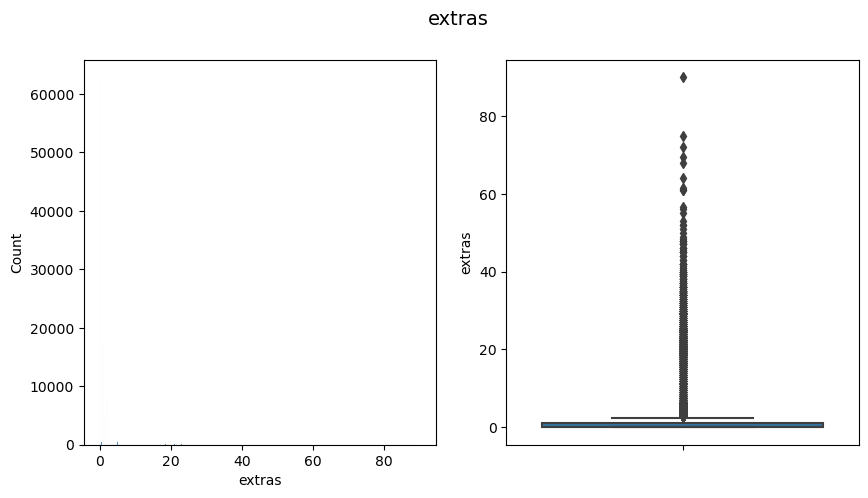

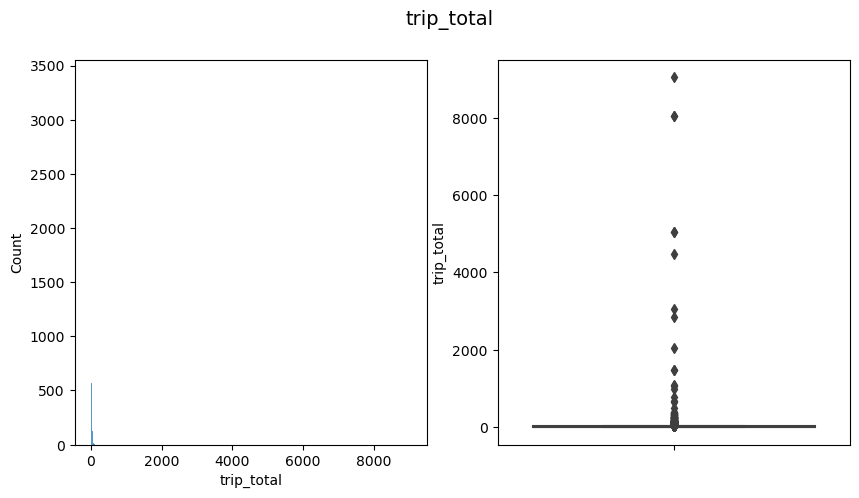

In [25]:
# Wyświetlenie histogramów i boxplotów zmiennych numerycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
for col in numeric_columns_name:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=df_edited, x=col, ax=ax1)
    sns.boxplot(data=df_edited, y=col, ax=ax2)
    fig.suptitle(f'{col}', fontsize=14)
    plt.show()

Rozkłady wszystkich zmiennych numerycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx" są widocznie prawoskośne. Uznałem zatem, że w dalszej części tego pliku przeprowadzę analizę tylko dla typowych obserwacji z owego zbioru.
- Usunąłem, więc wartości większe lub równe 98. percentylowi zmiennych 'trip_seconds', 'trip_km', 'trip_total', aby pozbyć się obserwacji, gdzie przejazd był długi i klient zapłacił taksówkarzowi łącznie bardzo wysoką kwotę.
- Usunąłem wartości mniejsze niż 1. percentyl zmiennych 'trip_seconds', 'trip_km', 'trip_total', aby pozbyć się obserwacji, gdzie przejazd w ogóle się nie odbył (zarejestrowano 0,000 przejechanych kilometrów).

Ze względu na ograniczony czas nie zdążyłem przeprowadzić osobnej analizy dla tych skrajnych usuniętych obserwacji. Możliwe, że z analizy tych skrajnych usuniętych obserwacji również można byłoby wydobyć przydatne informacje.

In [27]:
# Stworzenie nowego zbioru danych, w którym większość obserwacji odstających wybranych subiektywnie zmiennych numerycznych zostanie usunięta.
df_edited_no_outl = df_edited.copy()

df_edited_no_outl = df_edited_no_outl[(df_edited_no_outl['trip_seconds'] <= df_edited_no_outl['trip_seconds'].quantile(0.98))]
df_edited_no_outl = df_edited_no_outl[(df_edited_no_outl['trip_km'] <= df_edited_no_outl['trip_km'].quantile(0.98))]
df_edited_no_outl = df_edited_no_outl[(df_edited_no_outl['trip_total'] <= df_edited_no_outl['trip_total'].quantile(0.98))]

df_edited_no_outl = df_edited_no_outl[(df_edited_no_outl['trip_seconds'] > df_edited_no_outl['trip_seconds'].quantile(0.01))]
df_edited_no_outl = df_edited_no_outl[(df_edited_no_outl['trip_km'] > df_edited_no_outl['trip_km'].quantile(0.01))]
df_edited_no_outl = df_edited_no_outl[(df_edited_no_outl['trip_total'] > df_edited_no_outl['trip_total'].quantile(0.01))]

# Wyświetlenie pierwszych dziesięciu i ostatnich dziesięciu wierszy zmodyfikowanego zbioru danych "taxi_dane.xlsx".
# Wyświetlenie typów danych wszystkich zmiennych tego zbioru.
dfhead10_dftail10_dftypes(df_edited_no_outl)

taxi_id trip_seconds  \
Column types                                             object      float64   
0             1a0918b9bfea038d074d533672fa8d2a32a9b2628fbb34...     1800.000   
1             2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...      900.000   
2             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...      900.000   
3             fc662712fcee7cc17c53c79bb57f09d0a612440700aa67...     1620.000   
5             b103a8eb64ada2139668ccbde9c39af73dcf878f25f561...      600.000   
6             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...       60.000   
7             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...      480.000   
8             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...      360.000   
9             6387cede3d04d6fc99bcb37707880b3c8043f9e7284bfc...      540.000   
10            6b29392d56c7d58fe76ec1513ab5c0afc54acee011e973...      420.000   
99989         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1380.000   
99990         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      840.000   
99992         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      780.000   
99993         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      420.000   
99994         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      600.000   
99995         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1320.000   
99996         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1200.000   
99997         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...      445.000   
99998         eb0aa1f0dd78747ba0688bc786b87e037ed7bd33ecc4e1...      240.000   
99999         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...      839.000   

              trip_km pickup_community_area dropoff_community_area     fare  \
Column types  float64                object                 object  float64   
0               2.398                    32            out of town   31.450   
1              12.875                    28                      3   18.450   
2              15.450                    32                     41   21.050   
3               0.789                     8                     33   16.250   
5               5.633                     6                      8   10.250   
6               0.161                     3                      3    3.450   
7               8.047                     8                      3   12.450   
8               5.472                     6                      3    9.250   
9               0.386                    28                     33    8.450   
10              8.208                     3                      8   12.650   
99989          19.795           out of town            out of town   32.750   
99990           0.483           out of town            out of town    7.750   
99992           1.770           out of town            out of town    8.250   
99993           1.287           out of town            out of town    6.250   
99994           1.931           out of town            out of town    7.750   
99995           4.828           out of town            out of town   13.750   
99996          21.404           out of town            out of town   33.750   
99997           1.883           out of town            out of town    6.500   
99998           1.287           out of town            out of town    5.250   
99999           2.784           out of town            out of town    9.250   

                 tips    tolls   extras trip_total payment_type  \
Column types  float64  float64  float64    float64       object   
0               0.000    0.000    5.500     36.950         Cash   
1               0.000    0.000    0.000     18.450         Cash   
2               0.000    0.000    0.000     21.050         Cash   
3               0.000    0.000    1.000     17.250         Cash   
5               0.000    0.000    0.000     10.250         Cash   
6               0.000    0.000    0.000      3.450         Cash   
7               0.00

In [28]:
# Wyświetlenie zestawienia podstawowych statystyk opisowych zmiennych numerycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
describe_extra(df_edited_no_outl)

count    mean  median    mode     std  wsp_zmien   min  \
trip_seconds 87812.000 771.588 660.000 540.000 510.472      0.662 1.000   
trip_km      87812.000   5.563   3.396   2.897   6.149      1.105 0.016   
fare         87812.000  11.857   9.250   6.850   7.582      0.639 0.010   
tips         87812.000   0.696   0.000   0.000   1.544      2.218 0.000   
tolls        87812.000   0.000   0.000   0.000   0.040    152.621 0.000   
extras       87812.000   0.617   0.000   0.000   1.225      1.986 0.000   
trip_total   87812.000  13.171  10.250   8.250   8.692      0.660 1.000   

                 1%      5%     10%     25%     40%     50%     60%     75%  \
trip_seconds 60.000 180.000 240.000 420.000 540.000 660.000 780.000 960.000   
trip_km       0.129   0.290   0.499   1.609   2.655   3.396   4.393   6.920   
fare          3.650   4.650   5.250   6.850   8.250   9.250  10.650  14.250   
tips          0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
tolls         0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
extras        0.000   0.000   0.000   0.000   0.000   0.000   0.000   1.000   
trip_total    3.800   5.000   5.650   7.450   9.050  10.250  11.850  15.450   

                  90%      95%      99%      max  
trip_seconds 1440.000 1800.000 2520.000 3060.000  
trip_km        13.708   20.439   28.212   30.899  
fare           22.650   29.850   36.850   47.250  
tips            3.000    3.890    7.250   24.550  
tolls           0.000    0.000    0.000   10.000  
extras          2.000    2.000    4.500   26.000  
trip_total     25.259   34.400   43.500   47.310

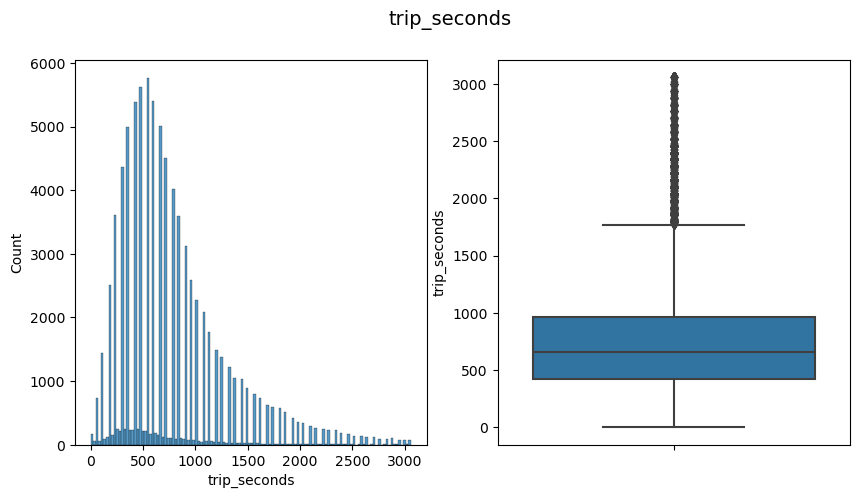

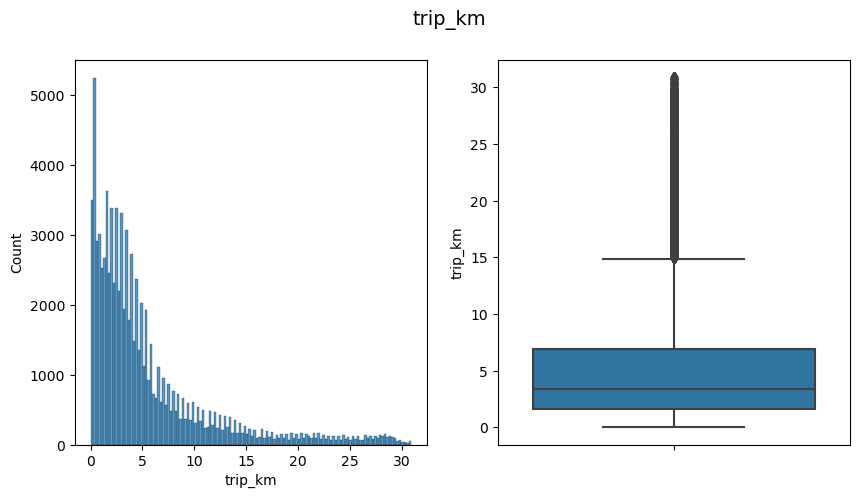

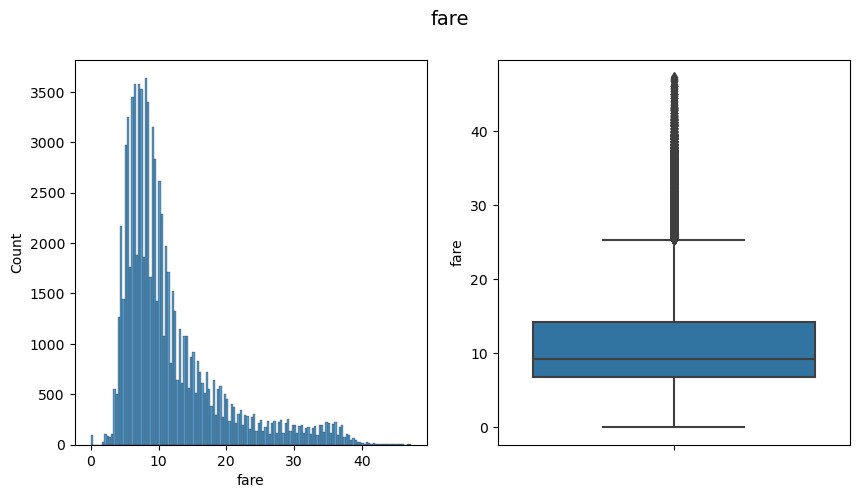

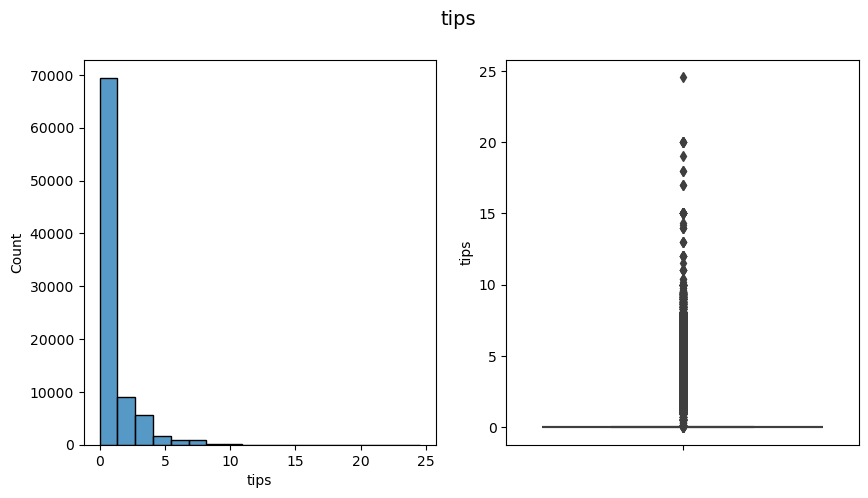

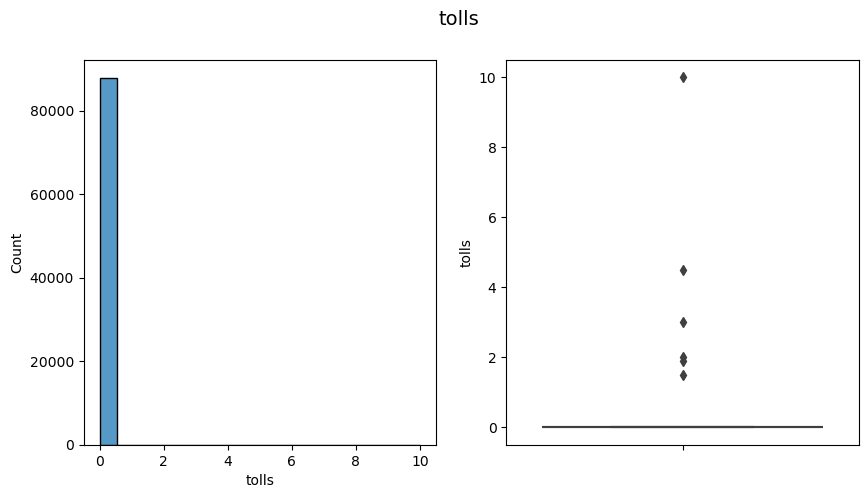

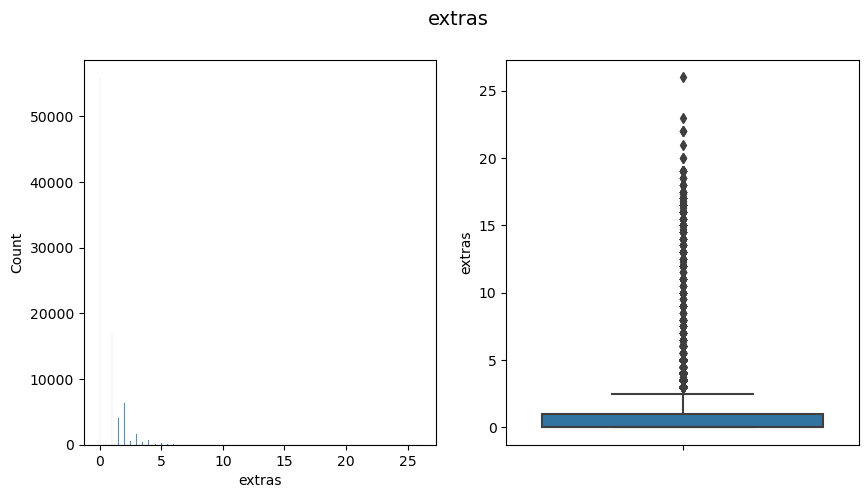

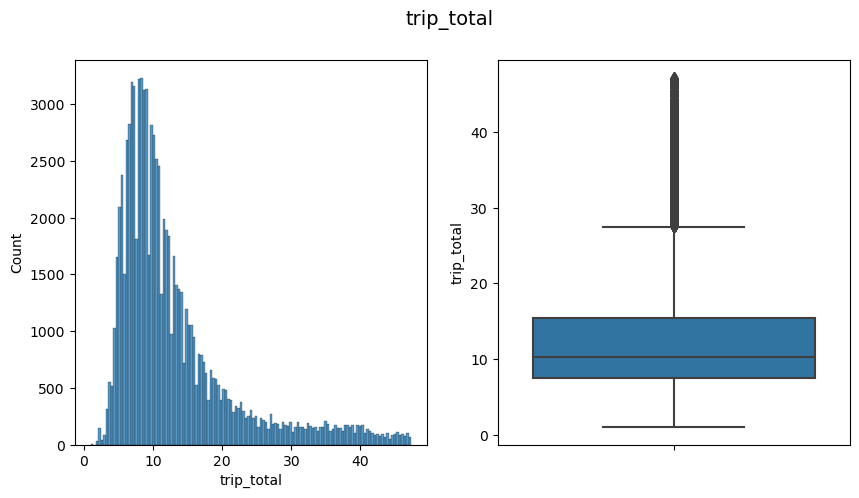

In [29]:
# Wyświetlenie histogramów i boxplotów zmiennych numerycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
for col in numeric_columns_name:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=df_edited_no_outl, x=col, ax=ax1)
    sns.boxplot(data=df_edited_no_outl, y=col, ax=ax2)
    fig.suptitle(f'{col}', fontsize=14)
    plt.show()

Powyższe rozkłady wszystkich zmiennych numerycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx" są już bardziej czytelnie niż te poprzednie. Zostawiłem wciąż wiele obserwacji odstających, gdyż uznałem, że stanowią one warte sprawdzenia skupiska.

#### Eksploracyjna analiza danych (EDA) zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".

Poniżej przeprowadziłem eksploracyjną analizę danych (EDA) zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx". Poniżej także wypisałem i zwizualizowałem te zmienne, które posiadają mniej niż 71 unikatowych wartości. Następnie z otrzymanych wyników wyciągnąłem wnioski.

In [32]:
# Wyświetlenie występujących w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typów zmiennych i ich liczby wystąpień.
# Wyświetlenie nazw wszystkich zmiennych, numerycznych zmiennych i kategorycznych zmiennych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
print('Występujące w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typy zmiennych i ich liczba wystąpień: ')
print(df_edited_no_outl.dtypes.value_counts(), "\n")

all_columns_name, numeric_columns_name, categoric_columns_name = get_columns_name(df_edited_no_outl)
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" wszystkich zmiennych jest łącznie {len(all_columns_name)}, są to: \n{all_columns_name}', '\n')
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych numerycznych jest łącznie {len(numeric_columns_name)}, są to: \n{numeric_columns_name}', '\n')
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych jest łącznie {len(categoric_columns_name)}, są to: \n{categoric_columns_name}')

# Wyświetlenie unikatowych wartości zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
print()
for col in categoric_columns_name:
    print(df_edited_no_outl[col].value_counts(),"\n")

Występujące w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typy zmiennych i ich liczba wystąpień: 
object     16
float64     7
Name: count, dtype: int64 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" wszystkich zmiennych jest łącznie 23, są to: 
['taxi_id', 'trip_seconds', 'trip_km', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company', 'year', 'month', 'day', 'day_group', 'day_of_week', 'trip_start_date_15', 'trip_start_time_15', 'trip_end_date_15', 'trip_end_time_15', 'trip_start_time_2h', 'trip_end_time_2h'] 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych numerycznych jest łącznie 7, są to: 
['trip_seconds', 'trip_km', 'fare', 'tips', 'tolls', 'extras', 'trip_total'] 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych jest łącznie 16, są to: 
['taxi_id', 'pickup_community_area', 'dropoff_community_area', 'payment_type', 'company', 'year', 'month', 'day', 'day_group', '

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych, które mają mniej niż 71 unikatowych wartości jest łącznie 11, są to: 
['pickup_community_area', 'dropoff_community_area', 'payment_type', 'company', 'year', 'month', 'day', 'day_group', 'day_of_week', 'trip_start_time_2h', 'trip_end_time_2h'] 



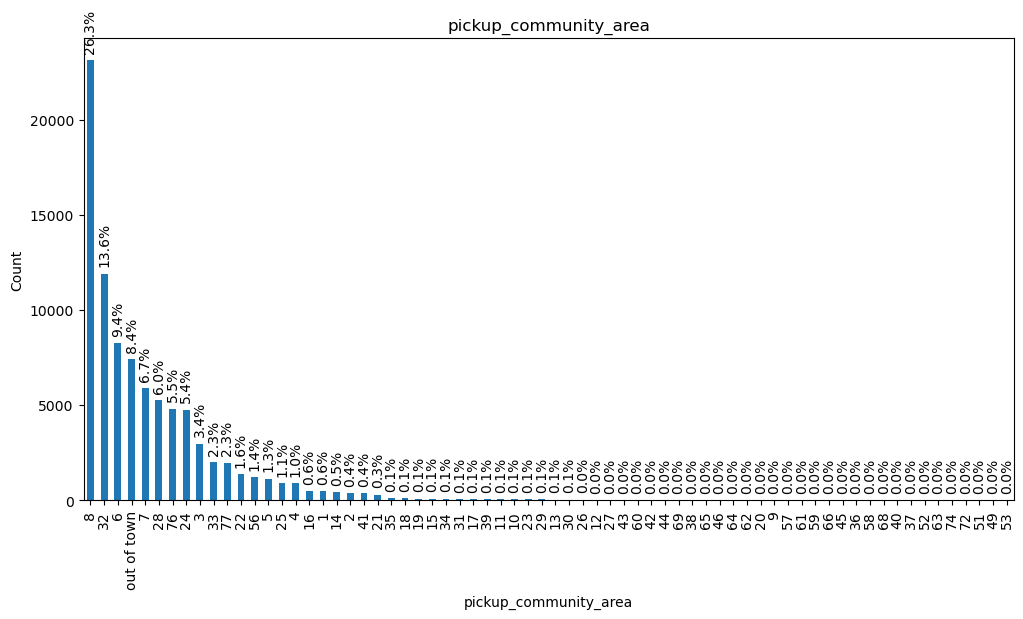

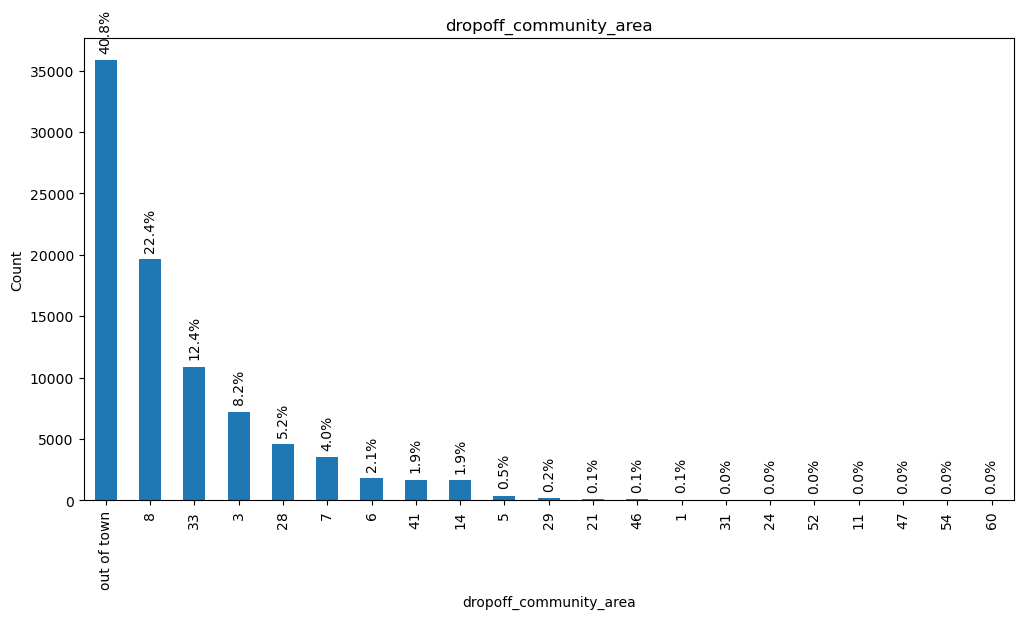

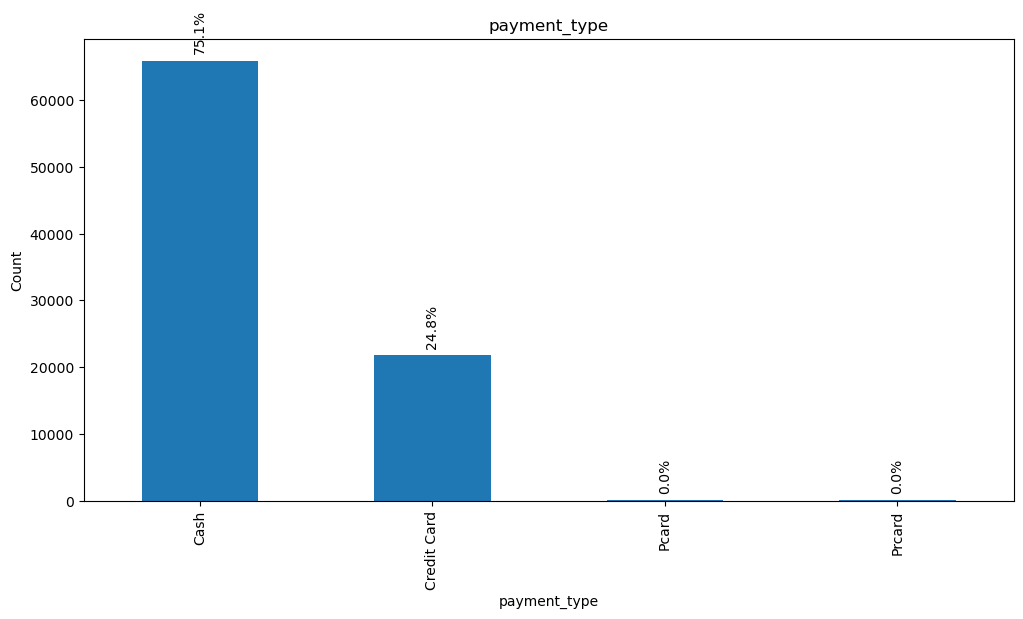

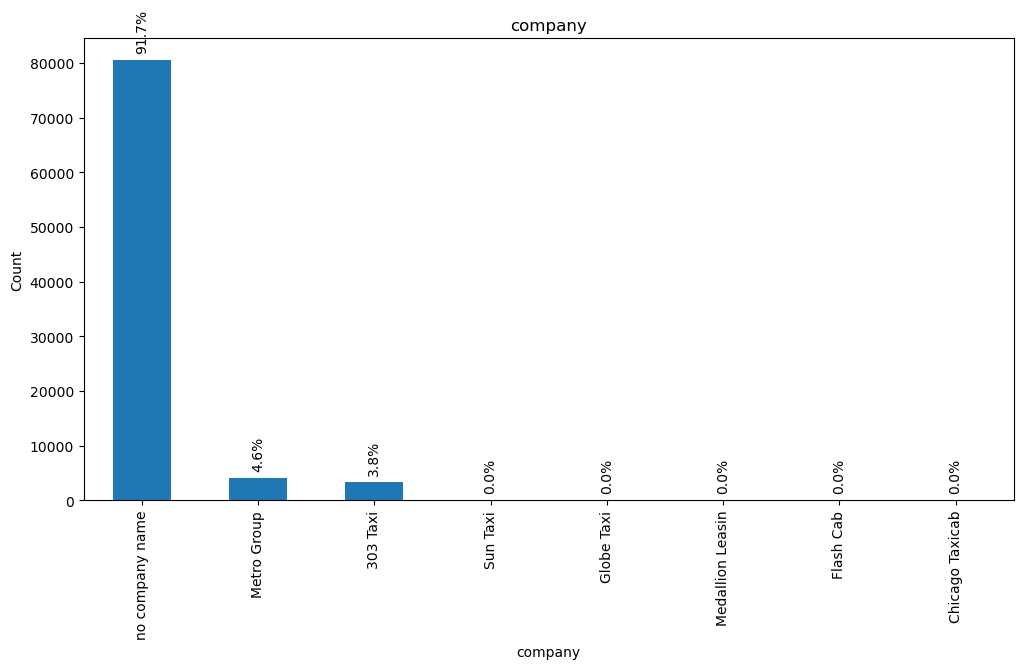

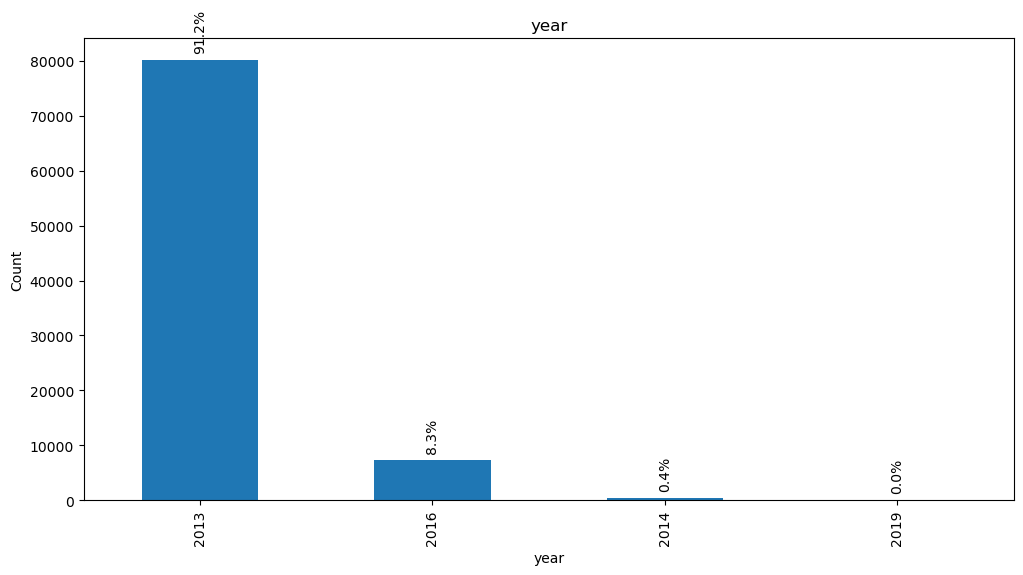

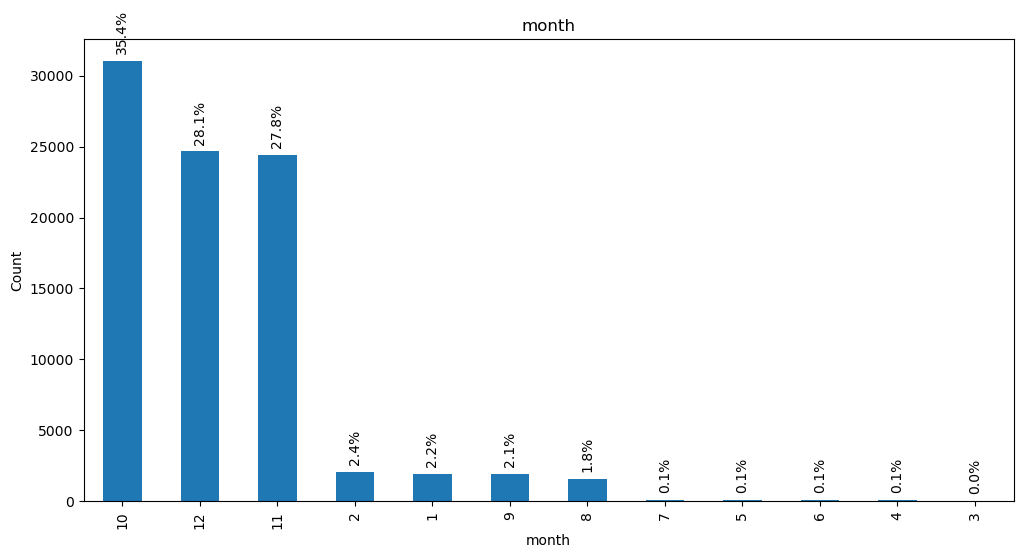

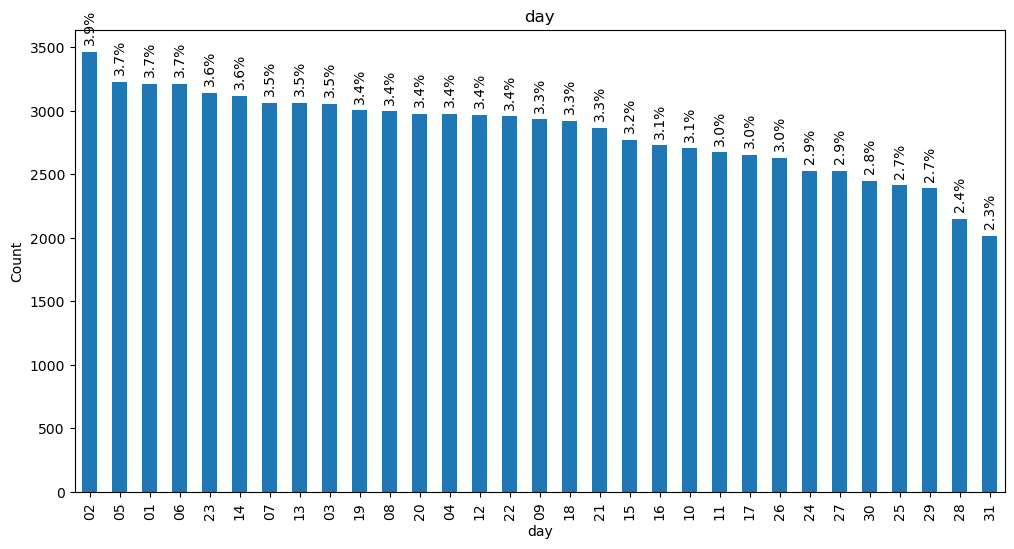

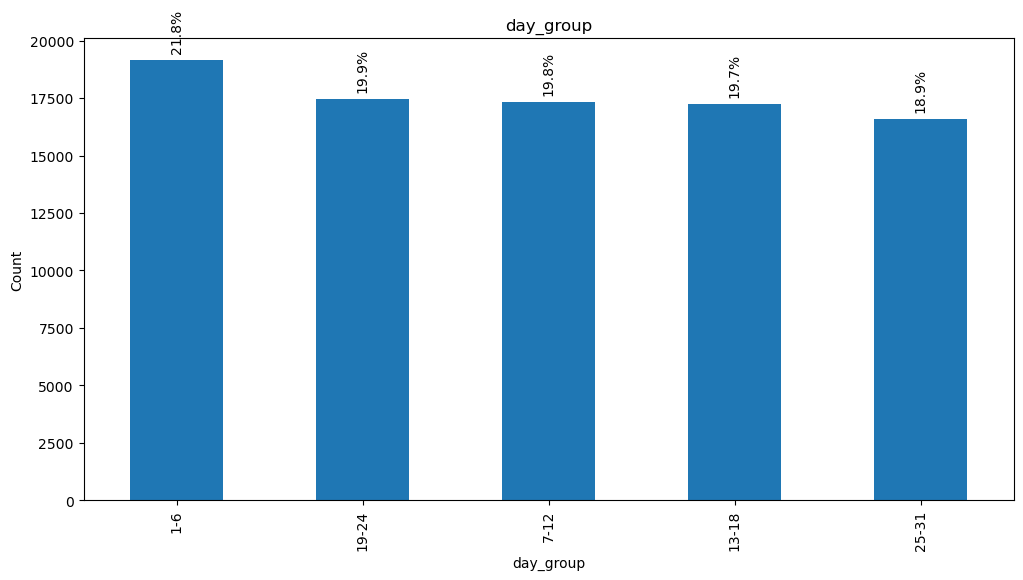

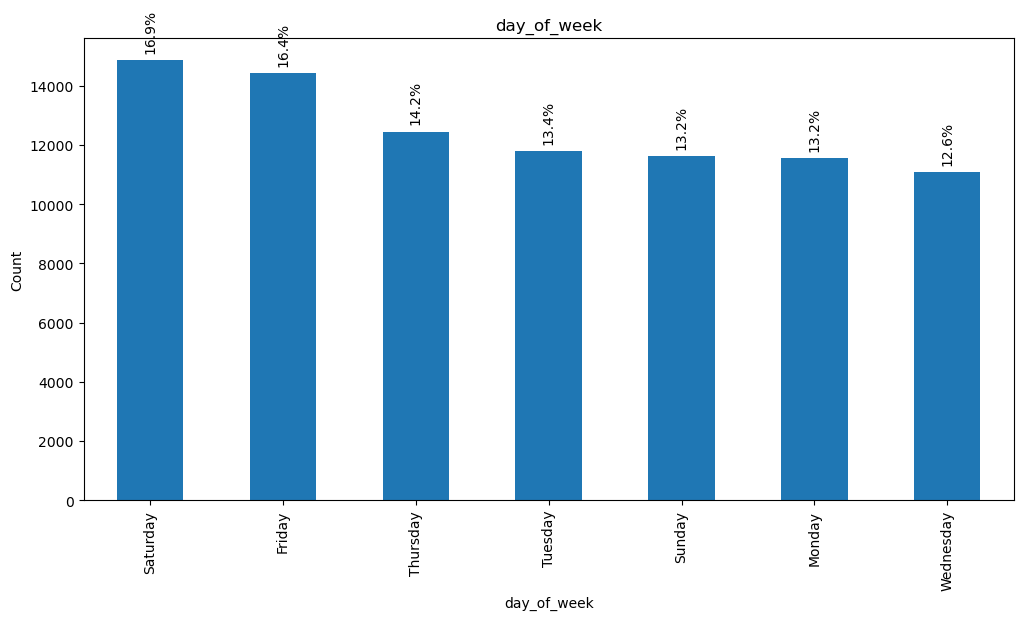

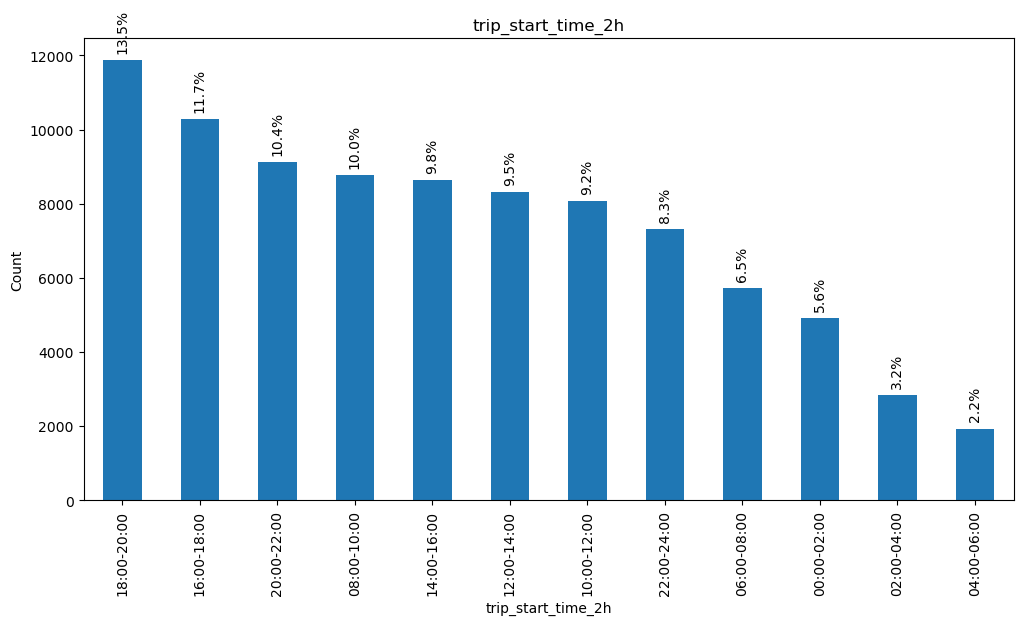

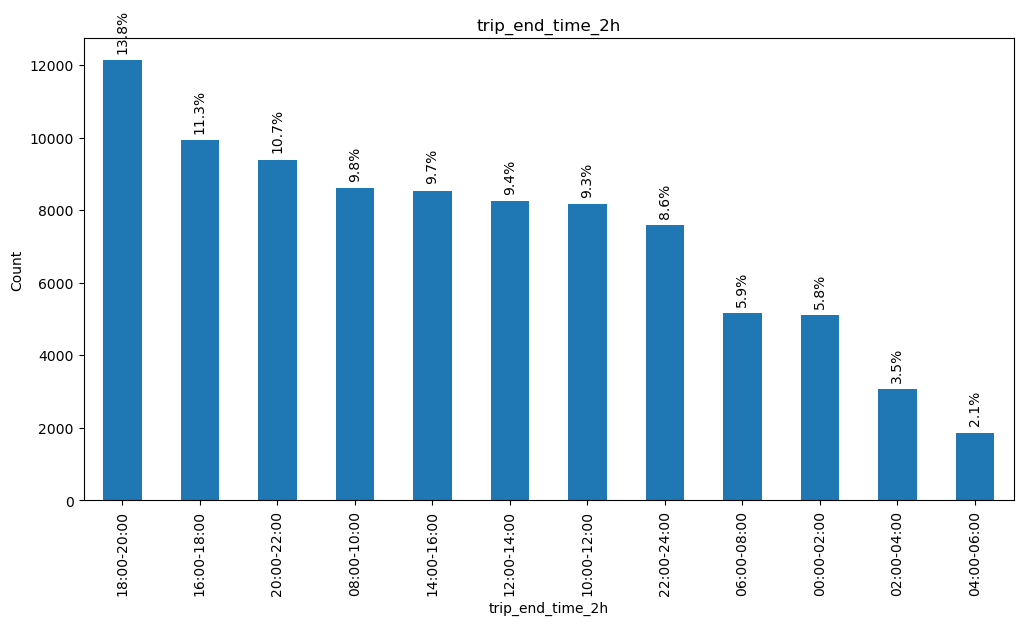

In [33]:
# Zwizualizowanie unikatowych wartości zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx", które posiadają mniej niż 71 unikatowych wartości.
category_columns_with_less_than_71_values = [col for col in categoric_columns_name if df_edited_no_outl[col].nunique() < 71]
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych, które mają mniej niż 71 unikatowych wartości jest łącznie {len(category_columns_with_less_than_71_values)}, są to: \n{category_columns_with_less_than_71_values}', '\n')

for col in category_columns_with_less_than_71_values:
    plt.figure(figsize=(12, 6))
    value_counts = df_edited_no_outl[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Dodanie nad każdą kolumną procentowej częstości wystąpień tej unikatowej wartości, którą reprezentuje.
    total = len(df_edited_no_outl[col])
    for i, count in enumerate(value_counts):
        percent = count / total * 100
        plt.annotate(f'{percent:.1f}%', xy=(i, count), ha='center', va='bottom', rotation=90, xytext=(0, 5), textcoords='offset points')
    
    plt.show()

Moje obserwacje wynikające z przyjrzenia się powyższej wizualizacji:
1. "taxi_id":
   - W zbiorze danych "taxi_dane.xlsx" widnieją taksówki bądź taksówkarze, którzy w analizowanym okresie odbyli ponad 1000 przejazdów.
   - W owym zbiorze widnieją także taksówki bądź taksówkarze, którzy w analizowanym okresie odbyli tylko 1 przejazd.

2. "pickup_community_area":
   - Najpopularniejszym i znacznie wyróżniającym się regionem, w których klienci rozpoczynają podróż taksówką jest region: 8 (26,3%).
   - Kolejnymi znaczącymi regionami są: 32, 6, "out of town", 7, 28, 76, 24.
   - Regiony, które coś znaczą, ale niewiele w porównaniu do poprzednich: 3, 33, 77.
   - Wszystkie pozostałe regiony w celu dalszej analizy można byłoby złączyć, zwłaszcza te, których częstość wystąpień wynosi lekko ponad 0%, ponieważ ich znaczenie w kontekście analizy jest potencjalnie niewielkie.
  
3. "dropoff_community_area":
   - Najpopularniejszym i znacznie wyróżniającym się regionem, w którym klienci kończą przejazd i wysiadają z taksówki jest region: "out of town" (40,8%).
   - Kolejnymi znaczącymi regionami są: 8, 33, 3.
   - Regiony, które coś znaczą, ale niewiele w porównaniu do poprzednich: 28, 7.
   - Wszystkie pozostałe regiony w celu dalszej analizy można byłoby złączyć, zwłaszcza te, których częstość wystąpień wynosi lekko ponad 0%, ponieważ ich znaczenie w kontekście analizy jest potencjalnie niewielkie.
   - Ilość regionów, w której klienci kończą przejazd jest znacznie mniejsza niż ilość regionów, w którym go zaczynają.
  
4. "payment_type":
   - Klienci za przejazd płacą głównie gotówką (75,1%).
   - Drugim najpopularniejszym sposobem płatności klientów za przejazd jest karta kredytowa (24,8%).
   - W celu opłacenia przejazdu klienci użyli marginalnie rzadko Pcard i Prcard. Częstość wystąpień tych sposobów płatności można byłoby złączyć w celu dalszej analizy, ponieważ ich znaczenie w kontekście analizy jest potencjalnie niewielkie.
  
5. "company":
   - W znacznej większości (91,7%) taksówkarze nie przynależą do żadnej firmy lub firma, do której przynależą nie jest znana.
   - Jeśli taksówkarz przynależy, do którejś z firm, są to potencjalnie kolejno Metro Group (4,6%) i 303 Taxi (3,8%).
   - Wszystkie pozostałe firmy w celu dalszej analizy można byłoby złączyć, zwłaszcza te, których częstość wystąpień wynosi lekko ponad 0%, ponieważ ich znaczenie w kontekście analizy jest potencjalnie niewielkie.

6. "year":
   - W zbiorze danych "taxi_dane.xlsx" głównie zarejestrowano przejazdy klientów taksówką odbyte w 2013 roku (91,2%). Po prostu twórcom tego zbioru udało się pozyskać dane głównie dla tego roku. Zatem korelacje zmiennnych z tą zmienną mogą być stronnicze i zbytnio bym im nie ufał.
   - Następnie najwięcej przejazdów klientów taksówką zarejestrowano w tym zbiorze dla roku 2016 (8,3%).
   - Według mnie owa zmienna jest bardzo mało przydatna, zatem usunąłbym ją ze zbioru.
  
7. "month":
   - Top 3 miesiące, podczas których klienci odbyli przejazdy taksówką, zarejestrowane w tym zbiorze: 10, 12, 11.
   - Miesiące, w których klienci także odbyli przejazdy taksówką, ale były one o wiele mniej popularne, niż te miesiące wymienione powyżej: 2, 1, 9, 8.
   - Wszystkie pozostałe miesiące w celu dalszej analizy można byłoby złączyć, gdyż częstość ich wystąpień wynosi lekko ponad 0%, a ich znaczenie w kontekście analizy jest potencjalnie niewielkie.
   - Częstością wartości tej zmiennej zbytnio bym się nie sugerował, bo może twórcom tego zbioru, udało się po prostu uzyskać dane na temat przejazdów taksówek z klientami, które akurat odbyły się w tych miesiącach. Zatem popularność niektórych miesięcy w tym zbiorze może być stronnicza.

8. "day":
   - Wyróżniającym się dniem miesiąca, na tle pozostałych, podczas którego klienci najchętniej (3,9%) odbyli przejazdy taksówką jest drugi dzień miesiąca.
   - Kolejnymi popularnymi dnia miesiąca są kolejno: 5, 1, 6.
   - Dniami miesiąca, podczas których klienci najmniej chętnie odbyli przejazdy taksówką są 28 i 31 dzień miesiąca.

9. "day_group":
    - Wyróżniającym się przedziałem dni miesiąca, na tle pozostałych, podczas których klienci najchętniej (21,8%) odbyli przejazdy taksówką jest przedział między pierwszym, a szóstym dniem miesiąca.
   - Pozostałe przedziały charakteryzują się podobną popularnością pod względem odbytych przejazdów taksówkarzy z klientami. Jednakże, na podstawie tej oraz poprzedniej zmiennej, można zauważyć, że popularność owych przejazdów spada w ostatnim tygodniu miesiąca.

10. "day_of_week":
    - Najwięcej przejazdów taksówkarzy z klientami w analizowanym okresie odbyło się kolejno w soboty (16,9%) i piątki (16,4%).
    - Najmniej przejazdów taksówkarzy z klientami w analizowanym okresie odbyło się kolejno w poniedziałki (13,2%) i środy (12,6%).

11. "trip_start_date_15":
   - Top 5 dat, w których klient wsiadł do taksówki i rozpoczął się przejazd: 2013-12-14, 2013-10-12, 2013-10-19, 2013-10-26, 2013-10-11.
   - Podczas niektórych dni zarejestrowano w tym zbiorze tylko jeden przejazd klienta taksówką.
  
12. "trip_start_time_15":
   - Top 5 przedziałów czasów, co 15 minut, w których klient wsiadł do taksówki i rozpoczął się przejazd: 19:00, 18:15, 19:15, 18:30, 18:00.
   - Bottom 5 przedziałów czasów, co 15 minut, w których klient wsiadł do taksówki i rozpoczął się przejazd: 03:30, 04:15, 05:00, 04:30, 04:45.
  
13. "trip_end_date_15":
   - Top 5 dat, w których zakończył się przejazd i klient wysiadł z taksówki jest takich samych, co w podpunkcie 11.
  
14. "trip_end_time_15":
   - Top 5 przedziałów czasów, co 15 minut, w których klient zakończył przejazd i wysiadł z taksówki: 19:15, 18:30, 19:00, 18:15, 19:30.
   - Bottom 5 przedziałów czasów, co 15 minut, w których klient zakończył przejazd i wysiadł z taksówki: 04:15, 05:15, 04:30, 04:45, 05:00.

15. "trip_start_time_2h":
   - Najwięcej klientów wsiada do taksówki i rozpoczyna przejazd między 18:00, a 20:00 (13,5%).
   - Ogólnie popularnym przedziałem, kiedy dużo klientów wsiada do taksówki i rozpoczyna przejazd jest przedział od 08:00 do 24:00.
   - Najmniej popularnym przedziałem, kiedy klient wsiada do taksówki i rozpoczyna przejazd jest przedział od 02:00 do 06:00.
  
16. "trip_end_time_2h":
   - Najwięcej klientów kończy przejazd i wysiada z taksówki między 18:00, a 20:00 (13,8%).
   - Ogólnie popularnym przedziałem, kiedy dużo klientów kończy przejazd i wysiada z taksówki jest przedział od 08:00 do 24:00.
   - Najmniej popularnym przedziałem, kiedy klient kończy przejazd i wysiada z taksówki jest przedział od 00:00 do 08:00. 

Ogólne wnioski:
Aby taksówkarzowi udało się w analizowanym okresie przewieźć jak największą ilość klientów prawdopodobnie:
- Powinien czekać na nich w regionie 8, 32, 6 lub "out of town". Najlepiej czekać na nich w regionie 8.
- Powinien być gotowy na przejazd do regionu: "out of town", 8, 33 i 3. Z perspektywy taksówkarza najkorzystniej by było, gdyby czekał on na terenie regionu 8 i przyjmował on tylko oferty, gdy klient potrzebuje dojechać do regionu 'out of town' lub 8.
- Powinien umożliwiać klientowi płatność gotówką i kartą.
- Może, ale nie musi przynależeć do jakiejś firmy. Dane sugerują, że nie powinien przynależeć do żadnej firmy, ponieważ takie firmy mogą potencjalnie pobierać jakieś odsetki od całkowitej kwoty opłaconej przez klienta za przejazd taksówką. Ta informacja może być jednak myląca, gdyż twórcom tego zbioru mogło się po prostu nie udać pozyskać informacji o przynależności poszczególnych taksówkarzy do firm.
- Powinien być do częstej dyspozycji w październiku, listopadzie i grudniu. Tą informacją bym się natomiast nie sugerował, bo może wynikać ona ze stronniczości wartości kolumny "month".
- Powinien być do dłuższej dyspozycji na początku miesiąca i potencjalnie do krótszej dyspozycji pod koniec miesiąca, aby sobie w te dni dłużej odpoczywać.
- Powinien być do dyspozycji między 16:00, a 20:00. Z perspektywy taksówkarza najkorzystniej by było, gdyby pracował on po 8 godzin dziennie między 14:00, a 22:00, czyli bardziej w godzinach popołudniowych i wieczornych, niż porannych.

Są to natomiast tylko wstępne wnioski wynikające z powyższych wizualizacji zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx", który zawiera głównie typowe obserwacje. Należałoby jednakowoż sprawdzić, czy faktycznie dzięki tej taktyce taksówkarz maksymalizowałby liczbę swoich klientów. Należałoby także sprawdzić, cy owa taktyka przekładałaby się także na zysk taksówkarza. Jeśli nie, warto byłoby przeanalizować, między którymi regionami kursowanie jest najbardziej opłacalne dla taksówkarzy.

Ze względu na ograniczony czas nie jestem w stanie dokładniej przeanalizować obserwacji i zależności, o których wspomniałem powyżej. 

W celu uzyskania bardziej jakościowych wyników z dalszej analizy: 
- Połączyłem rzadko występujące wartości w jedną kategorię dla każdej zmiennej kategorycznej w zbiorze danych "taxi_dane.xlsx".
- Usunąłem z owego zbioru kolumnę "year", bo nie jest mi ona potrzebna do dalszej analizy w dalszej części tego pliku.
- Usunąłem z owego zbioru kolumnę "day", bo stanowi ona dla mnie taką samą wartość analityczną, co kolumna "day_group".
- Usunąłem z owego zbioru kolumny 'trip_start_time_15' i 'trip_end_time_15', ponieważ uważam, że większą wartość dla analizy uzyskam z kolumn 'trip_start_time_2h' i 'trip_end_time_2h'.
- Usunąłem z owego zbioru kolumny 'trip_start_date_15' i 'trip_end_date_15', bo nie są mi one potrzebne do dalszej analizy w dalszej części tego pliku.

In [37]:
# Połączenie rzadko występujących wartości w jedną kategorię dla każdej zmiennej kategorycznej w zbiorze danych "taxi_dane.xlsx".
df_edited2_no_outl = df_edited_no_outl.copy()

retain_values = ['8', '32', '6', 'out of town', '7', '28', '76', '24', '3', '33', '77'] # Lista wartości, które nie mają być połączone.
df_edited2_no_outl['pickup_community_area'] = df_edited2_no_outl['pickup_community_area'].apply(lambda x: x if x in retain_values else 'other regions') # Połączenie wartości nie znajdujących się w zmiennej "retain_values" w jedną kategorię "other regions".

retain_values = ['out of town', '8', '33', '3', '28', '7']
df_edited2_no_outl['dropoff_community_area'] = df_edited2_no_outl['dropoff_community_area'].apply(lambda x: x if x in retain_values else 'other regions')

df_edited2_no_outl["payment_type"].replace(["Pcard", "Prcard"], "other payment types", inplace = True) 

retain_values = ['no company name', '303 Taxi', 'Metro Group',]
df_edited2_no_outl['company'] = df_edited2_no_outl['company'].apply(lambda x: x if x in retain_values else 'other companies')

df_edited2_no_outl["month"].replace([2, 1, 9, 8, 7, 5, 4, 6, 3], 'other months', inplace=True)

# Usunięcie ze zmodyfikowanego zbioru danych "taxi_dane.xlsx" kolumny 'trip_start_date_15', 'trip_start_time_15', 'trip_end_date_15', 'trip_end_time_15'. 
df_edited2_no_outl.drop(columns=['year', 'day', 'trip_start_date_15', 'trip_start_time_15', 'trip_end_date_15', 'trip_end_time_15'], inplace = True)

dfhead10_dftail10_dftypes(df_edited2_no_outl)

taxi_id trip_seconds  \
Column types                                             object      float64   
0             1a0918b9bfea038d074d533672fa8d2a32a9b2628fbb34...     1800.000   
1             2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...      900.000   
2             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...      900.000   
3             fc662712fcee7cc17c53c79bb57f09d0a612440700aa67...     1620.000   
5             b103a8eb64ada2139668ccbde9c39af73dcf878f25f561...      600.000   
6             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...       60.000   
7             061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...      480.000   
8             7a3ea6574e92c55cb68c90d7bb4a7c4b15d84a53594644...      360.000   
9             6387cede3d04d6fc99bcb37707880b3c8043f9e7284bfc...      540.000   
10            6b29392d56c7d58fe76ec1513ab5c0afc54acee011e973...      420.000   
99989         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1380.000   
99990         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      840.000   
99992         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      780.000   
99993         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      420.000   
99994         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...      600.000   
99995         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1320.000   
99996         dade76fa1c7a36b5beb9e6af50e4e1592a94b6fcdcd58e...     1200.000   
99997         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...      445.000   
99998         eb0aa1f0dd78747ba0688bc786b87e037ed7bd33ecc4e1...      240.000   
99999         cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...      839.000   

              trip_km pickup_community_area dropoff_community_area     fare  \
Column types  float64                object                 object  float64   
0               2.398                    32            out of town   31.450   
1              12.875                    28                      3   18.450   
2              15.450                    32          other regions   21.050   
3               0.789                     8                     33   16.250   
5               5.633                     6                      8   10.250   
6               0.161                     3                      3    3.450   
7               8.047                     8                      3   12.450   
8               5.472                     6                      3    9.250   
9               0.386                    28                     33    8.450   
10              8.208                     3                      8   12.650   
99989          19.795           out of town            out of town   32.750   
99990           0.483           out of town            out of town    7.750   
99992           1.770           out of town            out of town    8.250   
99993           1.287           out of town            out of town    6.250   
99994           1.931           out of town            out of town    7.750   
99995           4.828           out of town            out of town   13.750   
99996          21.404           out of town            out of town   33.750   
99997           1.883           out of town            out of town    6.500   
99998           1.287           out of town            out of town    5.250   
99999           2.784           out of town            out of town    9.250   

                 tips    tolls   extras trip_total payment_type  \
Column types  float64  float64  float64    float64       object   
0               0.000    0.000    5.500     36.950         Cash   
1               0.000    0.000    0.000     18.450         Cash   
2               0.000    0.000    0.000     21.050         Cash   
3               0.000    0.000    1.000     17.250         Cash   
5               0.000    0.000    0.000     10.250         Cash   
6               0.000    0.000    0.000      3.450         Cash   
7               0.00

In [38]:
# Wyświetlenie występujących w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typów zmiennych i ich liczby wystąpień.
# Wyświetlenie nazw wszystkich zmiennych, numerycznych zmiennych i kategorycznych zmiennych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
print('Występujące w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typy zmiennych i ich liczba wystąpień: ')
print(df_edited2_no_outl.dtypes.value_counts(), "\n")

all_columns_name, numeric_columns_name, categoric_columns_name = get_columns_name(df_edited2_no_outl)
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" wszystkich zmiennych jest łącznie {len(all_columns_name)}, są to: \n{all_columns_name}', '\n')
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych numerycznych jest łącznie {len(numeric_columns_name)}, są to: \n{numeric_columns_name}', '\n')
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych jest łącznie {len(categoric_columns_name)}, są to: \n{categoric_columns_name}')

# Wyświetlenie unikatowych wartości zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
print()
for col in categoric_columns_name:
    print(df_edited2_no_outl[col].value_counts(),"\n")

Występujące w zmodyfikowanym zbiorze danych "taxi_dane.xlsx" typy zmiennych i ich liczba wystąpień: 
object     10
float64     7
Name: count, dtype: int64 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" wszystkich zmiennych jest łącznie 17, są to: 
['taxi_id', 'trip_seconds', 'trip_km', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company', 'month', 'day_group', 'day_of_week', 'trip_start_time_2h', 'trip_end_time_2h'] 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych numerycznych jest łącznie 7, są to: 
['trip_seconds', 'trip_km', 'fare', 'tips', 'tolls', 'extras', 'trip_total'] 

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych jest łącznie 10, są to: 
['taxi_id', 'pickup_community_area', 'dropoff_community_area', 'payment_type', 'company', 'month', 'day_group', 'day_of_week', 'trip_start_time_2h', 'trip_end_time_2h']

taxi_id
6adb02556453c79096b14273579cbc9db7df43dd51e443d7c

W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych, które mają mniej niż 71 unikatowych wartości jest łącznie 9, są to: 
['pickup_community_area', 'dropoff_community_area', 'payment_type', 'company', 'month', 'day_group', 'day_of_week', 'trip_start_time_2h', 'trip_end_time_2h'] 



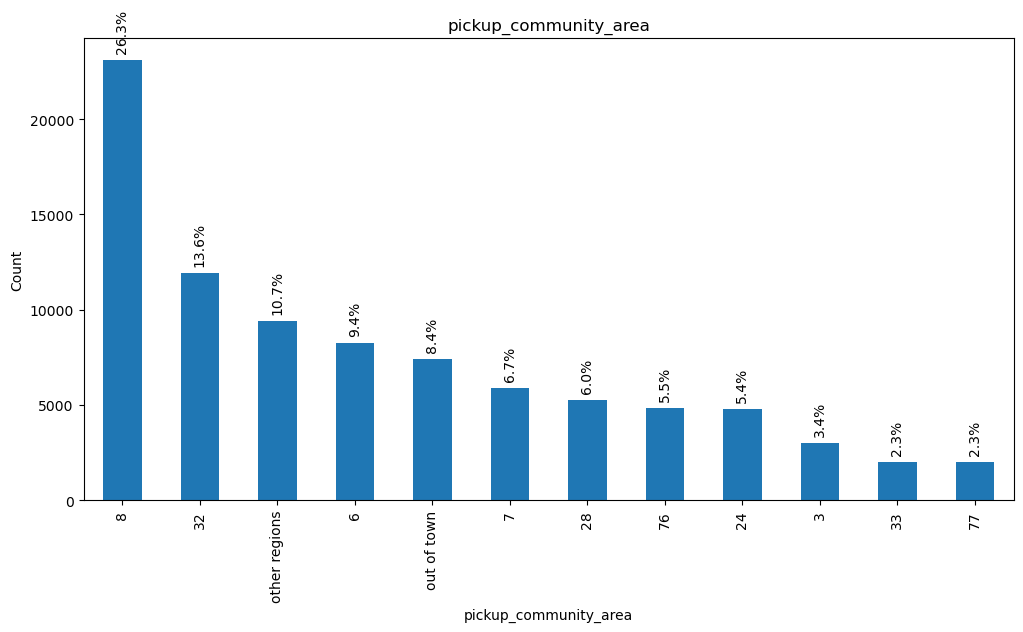

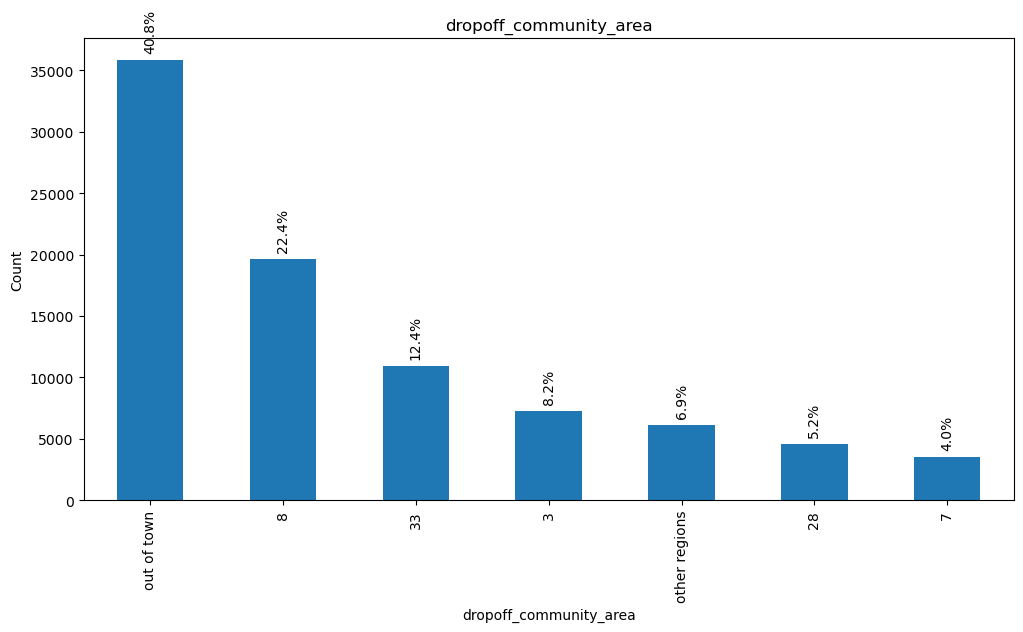

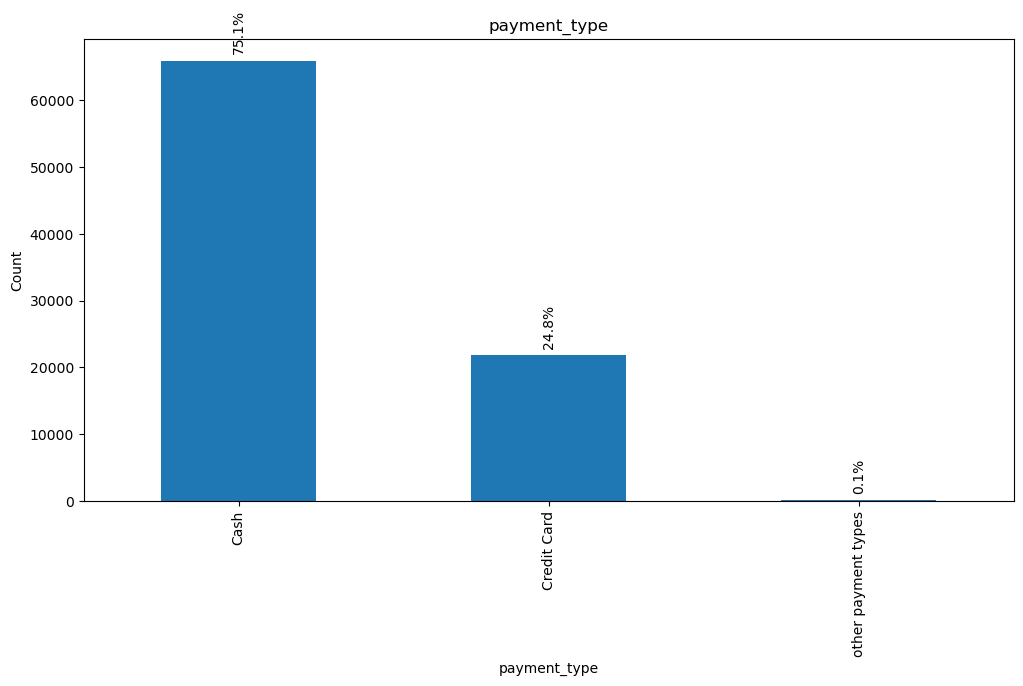

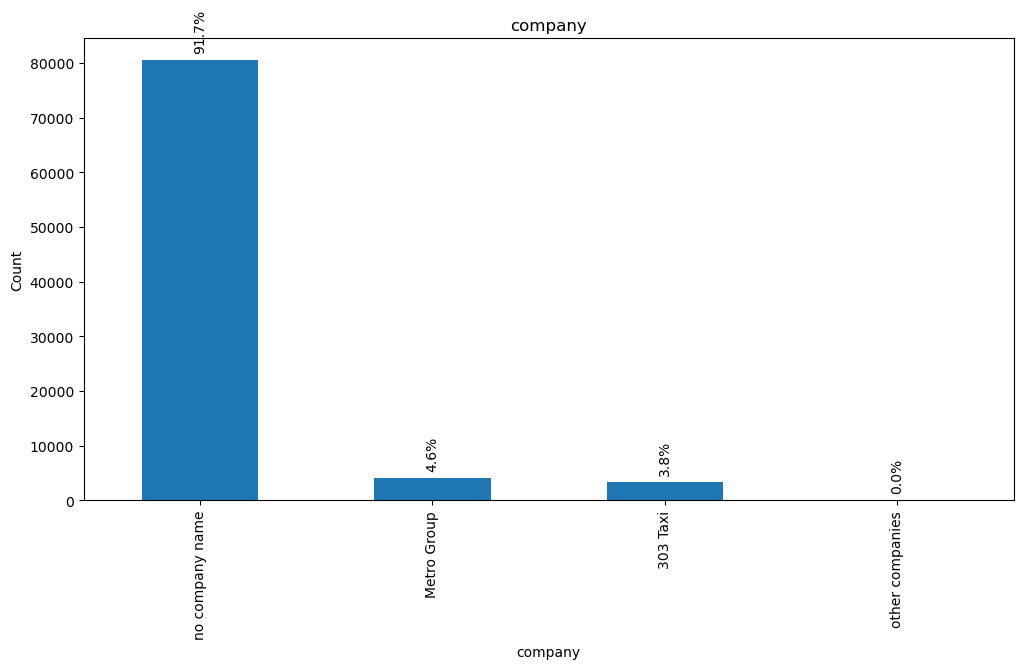

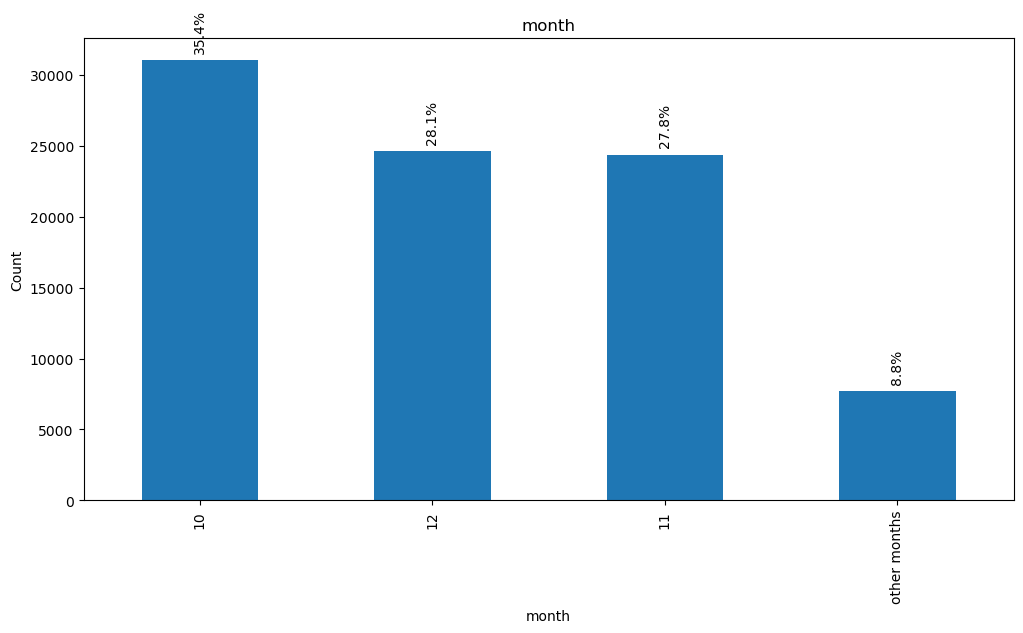

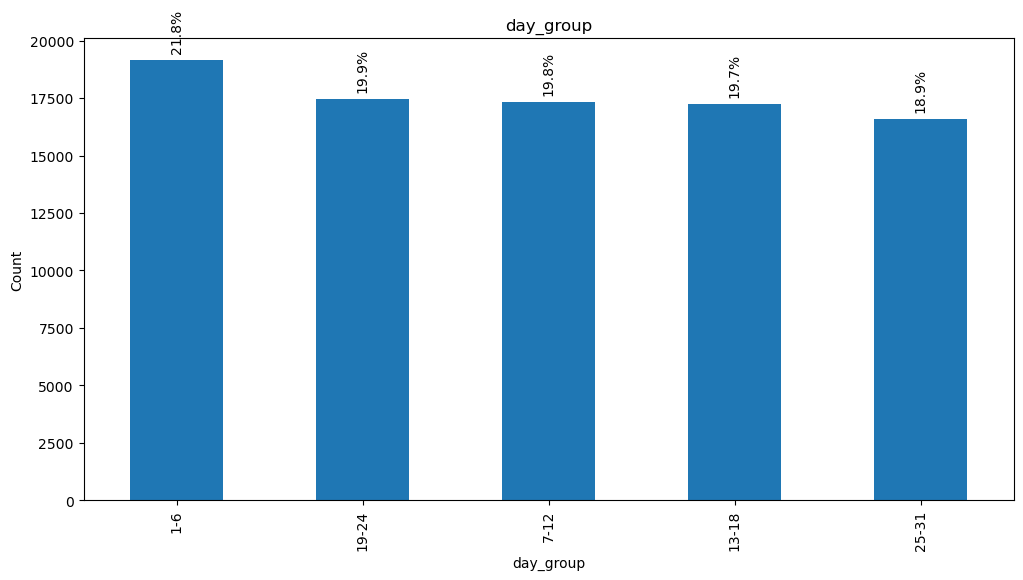

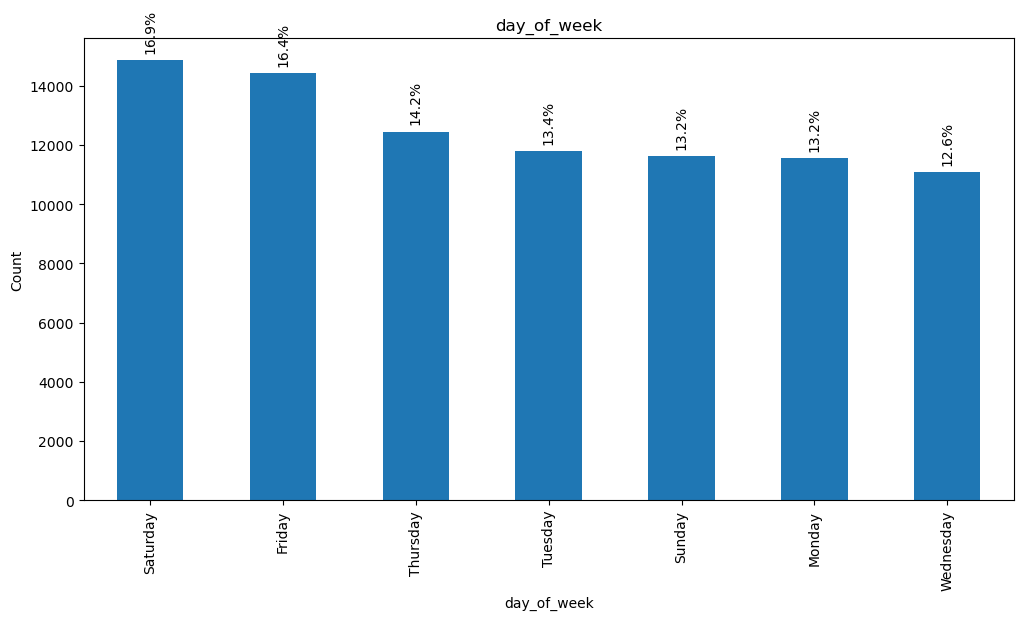

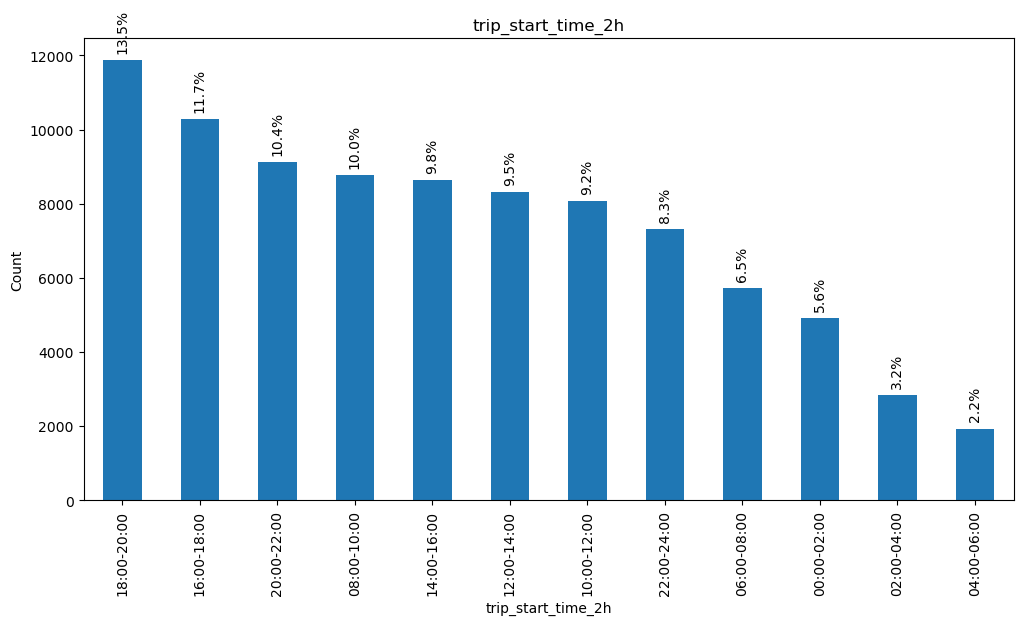

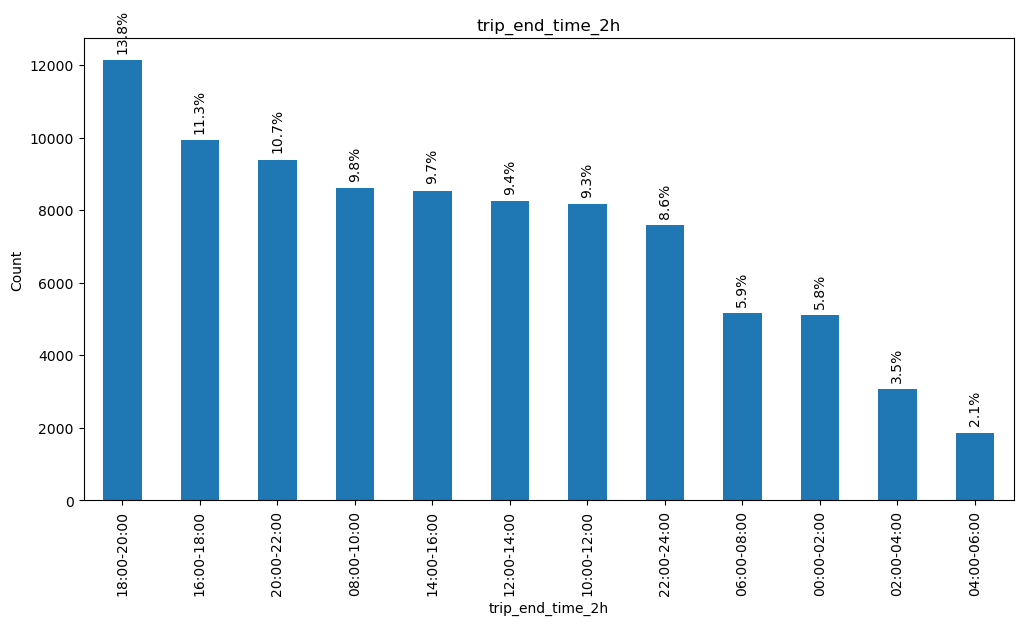

In [39]:
# Zwizualizowanie unikatowych wartości zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx", które posiadają mniej niż 71 unikatowych wartości.
category_columns_with_less_than_71_values = [col for col in categoric_columns_name if df_edited2_no_outl[col].nunique() < 71]
print(f'W zmodyfikowanym zbiorze danych "taxi_dane.xlsx" zmiennych kategorycznych, które mają mniej niż 71 unikatowych wartości jest łącznie {len(category_columns_with_less_than_71_values)}, są to: \n{category_columns_with_less_than_71_values}', '\n')

for col in category_columns_with_less_than_71_values:
    plt.figure(figsize=(12, 6))
    value_counts = df_edited2_no_outl[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Dodanie nad każdą kolumną procentowej częstości wystąpień tej unikatowej wartości, którą reprezentuje.
    total = len(df_edited2_no_outl[col])
    for i, count in enumerate(value_counts):
        percent = count / total * 100
        plt.annotate(f'{percent:.1f}%', xy=(i, count), ha='center', va='bottom', rotation=90, xytext=(0, 5), textcoords='offset points')
    
    plt.show()

W celu wykrycia jakichkolwiek zależności między zmiennymi kategorycznymi zmodyfikowanego zbioru danych "taxi_dane.xlsx":
- Stworzyłem tabele kontyngencji dla wszystkich par zmiennych z listy zawierającej nazwy zmiennych kategorycznych tego zbioru, ale które posiadają mniej niż 71 unikatowych wartości.
- Przeprowadziłem test chi-kwadrat dla wszystkich par zmiennych z tej listy.
- Przeprowadziłem analizę korelacji V-Craméra dla wszystkich par zmiennych z tej listy.

In [41]:
# Stworzenie tabel kontyngencji dla wszystkich par zmiennych ze wspomnianej powyżej listy.
contingency_tables = {}
for col1, col2 in combinations(category_columns_with_less_than_71_values, 2):
    # Tabela kontyngencji z wartościami liczbowymi.
    contingency_table_value = pd.crosstab(df_edited2_no_outl[col1], df_edited2_no_outl[col2])
    
    # Tabela kontyngencji z procentami częstości wystąpień.
    contingency_table_percent = pd.crosstab(df_edited2_no_outl[col1], df_edited2_no_outl[col2], normalize='all') * 100
    
    # Łączenie wartości liczbowych i procentów w jeden DataFrame.
    combined_table = contingency_table_value.astype(str) + ' (' + contingency_table_percent.round(2).astype(str) + '%)'
    contingency_tables[(col1, col2)] = combined_table

# Wyświetlenie wszystkich stworzonych tabel kontyngencji.
for (col1, col2), table in contingency_tables.items():
    print(f"Contingency Table for {col1} and {col2}:")
    print(table)
    print()

Contingency Table for pickup_community_area and dropoff_community_area:
dropoff_community_area            28             3            33  \
pickup_community_area                                              
24                        44 (0.05%)   159 (0.18%)   131 (0.15%)   
28                       780 (0.89%)   147 (0.17%)  1029 (1.17%)   
3                         28 (0.03%)  1466 (1.67%)    28 (0.03%)   
32                       491 (0.56%)    354 (0.4%)  3879 (4.42%)   
33                       450 (0.51%)    20 (0.02%)    792 (0.9%)   
6                        163 (0.19%)  1694 (1.93%)   241 (0.27%)   
7                         61 (0.07%)   339 (0.39%)    264 (0.3%)   
76                          0 (0.0%)   236 (0.27%)    58 (0.07%)   
77                          0 (0.0%)   840 (0.96%)     8 (0.01%)   
8                       2447 (2.79%)   835 (0.95%)  4233 (4.82%)   
other regions            143 (0.16%)  1146 (1.31%)   245 (0.28%)   
out of town                 0 (0.0%)      4 

In [42]:
# Przeprowadzenie testu chi-kwadrat dla każdej tabeli kontyngencji.
test_chi2_results = []
for (col1, col2), table in contingency_tables.items():
    # Stworzenie tabeli kontyngencji z wartościami liczbowymi.
    contingency_table = pd.crosstab(df_edited2_no_outl[col1], df_edited2_no_outl[col2])
    
    # Przeprowadzenie testu chi-kwadrat.
    test_chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Zapisanie uzyskanych wyników z przeprowadzonego test chi-kwadrat do listy.
    test_chi2_results.append({
        'col1': col1,
        'col2': col2,
        'test_chi2': test_chi2,
        'p-value': p_value,
        'degrees_of_freedom': dof,
        'expected_frequencies': expected
    })

# Konwersja listy do DataFrame.
df_test_chi2_results = pd.DataFrame(test_chi2_results)

df_test_chi2_results

col1                    col2  test_chi2  p-value  \
0    pickup_community_area  dropoff_community_area  48209.951    0.000   
1    pickup_community_area            payment_type   1047.345    0.000   
2    pickup_community_area                 company  85961.490    0.000   
3    pickup_community_area                   month  84438.632    0.000   
4    pickup_community_area               day_group    417.460    0.000   
5    pickup_community_area             day_of_week   1612.833    0.000   
6    pickup_community_area      trip_start_time_2h   4990.981    0.000   
7    pickup_community_area        trip_end_time_2h   4957.549    0.000   
8   dropoff_community_area            payment_type    370.731    0.000   
9   dropoff_community_area                 company  11502.581    0.000   
10  dropoff_community_area                   month  12497.011    0.000   
11  dropoff_community_area               day_group    553.805    0.000   
12  dropoff_community_area             day_of_week    805.557    0.000   
13  dropoff_community_area      trip_start_time_2h   7828.703    0.000   
14  dropoff_community_area        trip_end_time_2h   7845.284    0.000   
15            payment_type                 company    411.086    0.000   
16            payment_type                   month    400.444    0.000   
17            payment_type               day_group     55.320    0.000   
18            payment_type             day_of_week    141.028    0.000   
19            payment_type      trip_start_time_2h    228.395    0.000   
20            payment_type        trip_end_time_2h    222.226    0.000   
21                 company                   month  83138.245    0.000   
22                 company               day_group    437.196    0.000   
23                 company             day_of_week    103.527    0.000   
24                 company      trip_start_time_2h   1420.176    0.000   
25                 company        trip_end_time_2h   1432.838    0.000   
26                   month               day_group   1057.226    0.000   
27                   month             day_of_week   1485.324    0.000   
28                   month      trip_start_time_2h   1641.808    0.000   
29                   month        trip_end_time_2h   1673.345    0.000   
30               day_group             day_of_week   2484.586    0.000   
31               day_group      trip_start_time_2h    231.223    0.000   
32               day_group        trip_end_time_2h    222.922    0.000   
33             day_of_week      trip_start_time_2h   4877.784    0.000   
34             day_of_week        trip_end_time_2h   4624.318    0.000   
35      trip_start_time_2h        trip_end_time_2h 761499.288    0.000   

    degrees_of_freedom                               expected_frequencies  
0                   66  [[250.15004782945383, 393.11620279688424, 592....  
1                   22  [[3581.5926752607843, 1183.2580512913953, 3.14...  
2                   33  [[178.9656083451009, 217.08267662734022, 4369....  
3                   33  [[1685.8386553090693, 1324.3780804445862, 1339...  
4                   44  [[1039.803215961372, 937.1260419988157, 949.07...  
5                   66  [[783.571812508541, 628.0085637498291, 807.191...  
6                  121  [[267.1452648840705, 154.42299457932856, 104.9...  
7                  121  [[277.4075524985196, 166.53140800801714, 101.3...  
8                   12  [[3460.6538286338996, 1143.3032387373023, 3.04...  
9                   18  [[172.92251628479022, 209.75249396437843, 4222...  
10                  18  [[1628.91331480891, 1279.658099120849, 1294.03...  
11                  24  [[1004.6924110599919, 905.482314490047, 917.02...  
12                  36  [[757.1131166583154, 606.8027376668337, 779.93...  
13                  66  [[258.12462989113106, 149.20862752243428, 101....  
14                  66  [[268.04039311255866, 160.9081788366055, 97.95...  
15                   6  [[2475.866077529267, 3003.189495740901, 604

Wyniki testu chi-kwadrat dla każdej pary zmiennych z listy wykazały p-value równe 0,000. Jest to podejrzany rezultat. Możliwe jednak, że nie jest on błędny, ponieważ wydobywając owe p-value innym sposobem, zauważyłem, że są one skrajnie małe, przez co Jupyter Notebook zaokrągla je do zera. Nie wykluczam jednak, że ten rezultat może wynikać z popełnionego przeze mnie błędu.

Zakładając jednak, że owe wyniki są prawidłowe to dla każdej utworzonej pary zmiennych z listy należy odrzucić hipotezę zerową na korzyść hipotezy alternatywnej, która mówi, że mało prawdopodobne jest to, że zaobserwowany związek między zmiennymi jest wynikiem przypadku, co oznacza, że istnieje silny związek między tymi zmiennymi. Między tymi parami nawet bardzo silny związek.

In [44]:
# Funkcja do obliczania V-Craméra.
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    test_chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    
    return np.sqrt(test_chi2 / (n * (min(contingency_table.shape) - 1)))

# Stworzenie macierzy korelacji V-Craméra.
v_cramer_matrix = pd.DataFrame(index=category_columns_with_less_than_71_values, columns=category_columns_with_less_than_71_values)

for col1, col2 in combinations(category_columns_with_less_than_71_values, 2):
    v_cramer = cramers_v(df_edited2_no_outl[col1], df_edited2_no_outl[col2])
    v_cramer_matrix.at[col1, col2] = v_cramer
    v_cramer_matrix.at[col2, col1] = v_cramer

# Wypełnienie przekątnej macierzy korelacji V-Craméra jedynkami.
np.fill_diagonal(v_cramer_matrix.values, 1)

# Konwersja macierzy korelacji V-Craméra do DataFrame.
df_cramer_v = pd.DataFrame(v_cramer_matrix)

df_cramer_v

pickup_community_area dropoff_community_area  \
pickup_community_area                      1                  0.302   
dropoff_community_area                 0.302                      1   
payment_type                           0.077                  0.046   
company                                0.571                  0.209   
month                                  0.566                  0.218   
day_group                              0.034                  0.040   
day_of_week                            0.055                  0.039   
trip_start_time_2h                     0.072                  0.122   
trip_end_time_2h                       0.072                  0.122   

                       payment_type company month day_group day_of_week  \
pickup_community_area         0.077   0.571 0.566     0.034       0.055   
dropoff_community_area        0.046   0.209 0.218     0.040       0.039   
payment_type                      1   0.048 0.048     0.018       0.028   
company                       0.048       1 0.562     0.041       0.020   
month                         0.048   0.562     1     0.063       0.075   
day_group                     0.018   0.041 0.063         1       0.084   
day_of_week                   0.028   0.020 0.075     0.084           1   
trip_start_time_2h            0.036   0.073 0.079     0.026       0.096   
trip_end_time_2h              0.036   0.074 0.080     0.025       0.094   

                       trip_start_time_2h trip_end_time_2h  
pickup_community_area               0.072            0.072  
dropoff_community_area              0.122            0.122  
payment_type                        0.036            0.036  
company                             0.073            0.074  
month                               0.079            0.080  
day_group                           0.026            0.025  
day_of_week                         0.096            0.094  
trip_start_time_2h                      1            0.888  
trip_end_time_2h                    0.888                1

In [45]:
# Wypisanie korelacji o wartości większej lub równej 0,3.
print("Wartości korelacji V-Craméra większe lub równe 0,3: ", "\n")
for col1, col2 in combinations(category_columns_with_less_than_71_values, 2):
    v_cramer = df_cramer_v.at[col1, col2]
    if v_cramer >= 0.3:
        print(f"Wartość korelacji V-Craméra między {col1} a {col2}: {v_cramer}")

Wartości korelacji V-Craméra większe lub równe 0,3:  

Wartość korelacji V-Craméra między pickup_community_area a dropoff_community_area: 0.30249331754933595
Wartość korelacji V-Craméra między pickup_community_area a company: 0.5712344705419368
Wartość korelacji V-Craméra między pickup_community_area a month: 0.5661519826190929
Wartość korelacji V-Craméra między company a month: 0.5617755912852349
Wartość korelacji V-Craméra między trip_start_time_2h a trip_end_time_2h: 0.8878947209810696


Przedstawione powyżej tabele kontyngencji, test chi-kwadrat i analiza korelacji V-Craméra służyły jedynie do znalezienia wstępnych zależności między utworzonymi parami zmiennych. Ich rola była głównie zwiadowcza, gdyż w dalszej części tego pliku przeprowadzone zostaną kolejne testy statystyczne i analiza korelacji już dla wszystkich zmiennych zmodyfikowanego zbioru danych.

### Eksploracyjna analiza danych (EDA) całego zmodyfikowanego zbioru danych "taxi_dane.xlsx".

Uważam, że zmodyfikowany zbiór danych "taxi_dane.xlsx" jest już gotowy do przeprowadzenia obszerniejszej analizy. W związku z tym w celu wykrycia jakichkolwiek zależności między wszystkimi zmiennymi owego zbioru:
- Zakodowałem zmienne kategoryczne przy użyciu James-Stein Encoder, aby przygotować dane do analizy statystycznej.
- Zwizualizowałem siatkę wykresów, którymi są wykresy rozrzutu (scatter plots) dla każdej pary zmiennych owego zbioru.
- Przeprowadziłem analizę korelacji Pearsona, Spearmana i Kendalla dla wszystkich par zmiennych tego zbioru, aby zidentyfikować zarówno liniowe, jak i nieliniowe zależności między nimi.
- Przeprowadziłem prostą regresję liniową za pomocą pakietu 'stattsmodels', aby określić, które zmienne mają statystycznie istotny wpływ na zmienną "trip_total", która najbardziej mnie interesuje.

In [49]:
# Zakodowanie wszystkich zmiennych kategorycznych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
encoder = ce.JamesSteinEncoder(cols=categoric_columns_name)
df_edited2_no_outl_encoded = encoder.fit_transform(df_edited2_no_outl[categoric_columns_name], df_edited2_no_outl['trip_total'])

df_edited2_no_outl_encoded = pd.concat([df_edited2_no_outl[numeric_columns_name], df_edited2_no_outl_encoded], axis=1)

# Wyświetlenie pierwszych dziesięciu i ostatnich dziesięciu wierszy zmodyfikowanego zbioru danych "taxi_dane.xlsx".
# Wyświetlenie typów danych wszystkich zmiennych tego zbioru.
dfhead10_dftail10_dftypes(df_edited2_no_outl_encoded)

trip_seconds  trip_km     fare     tips    tolls   extras  \
Column types      float64  float64  float64  float64  float64  float64   
0                1800.000    2.398   31.450    0.000    0.000    5.500   
1                 900.000   12.875   18.450    0.000    0.000    0.000   
2                 900.000   15.450   21.050    0.000    0.000    0.000   
3                1620.000    0.789   16.250    0.000    0.000    1.000   
5                 600.000    5.633   10.250    0.000    0.000    0.000   
6                  60.000    0.161    3.450    0.000    0.000    0.000   
7                 480.000    8.047   12.450    0.000    0.000    0.000   
8                 360.000    5.472    9.250    2.000    0.000    0.000   
9                 540.000    0.386    8.450    0.000    0.000    0.000   
10                420.000    8.208   12.650    0.000    0.000    0.000   
99989            1380.000   19.795   32.750    7.350    0.000    4.000   
99990             840.000    0.483    7.750    0.000    0.000    0.000   
99992             780.000    1.770    8.250    2.000    0.000    0.000   
99993             420.000    1.287    6.250    1.000    0.000    0.000   
99994             600.000    1.931    7.750    0.000    0.000    0.000   
99995            1320.000    4.828   13.750    2.950    0.000    1.000   
99996            1200.000   21.404   33.750    7.550    0.000    4.000   
99997             445.000    1.883    6.500    2.000    0.000    0.000   
99998             240.000    1.287    5.250    2.000    0.000    1.000   
99999             839.000    2.784    9.250    0.000    0.000    0.000   

             trip_total  taxi_id pickup_community_area dropoff_community_area  \
Column types    float64  float64               float64                float64   
0                36.950   13.677                12.311                 14.280   
1                18.450   12.944                12.422                 11.913   
2                21.050   13.883                12.311                 15.376   
3                17.250   14.154                11.885                 11.694   
5                10.250   12.583                12.433                 11.935   
6                 3.450   11.822                11.534                 11.913   
7                12.450   13.883                11.885                 11.913   
8                11.250   11.822                12.433                 11.913   
9                 8.450   13.456                12.422                 11.694   
10               12.650   11.520                11.534                 11.935   
99989            44.600   13.799                12.134                 14.280   
99990             7.750   13.799                12.134                 14.280   
99992            10.750   13.799                12.134                 14.280   
99993             7.250   13.799                12.134                 14.280   
99994             7.750   13.799                12.134                 14.280   
99995            18.200   13.799                12.134                 14.280   
99996            45.800   13.799                12.134                 14.280   
99997             9.000    9.127                12.134                 14.280   
99998             8.750   14.180                12.134                 14.280   
99999             9.250    9.127                12.134                 14.280   

             payment_type  company    month day_group day_of_week  \
Column types      float64  float64  float64   float64     float64   
0                  11.939   13.294   13.414    13.293      13.014   
1                  11.939   13.294   13.414    13.293      13.014   
2                  11.939   13.294   13.414    13.293      13.014   
3                  11.939   13.294   13.414    13.293      13.014   
5                  11.939   13.294   13.414    13.293      13.014   
6                  11.939   13.294   13.414    13.293      13.014   
7                  11.939   13.294   13.414    13

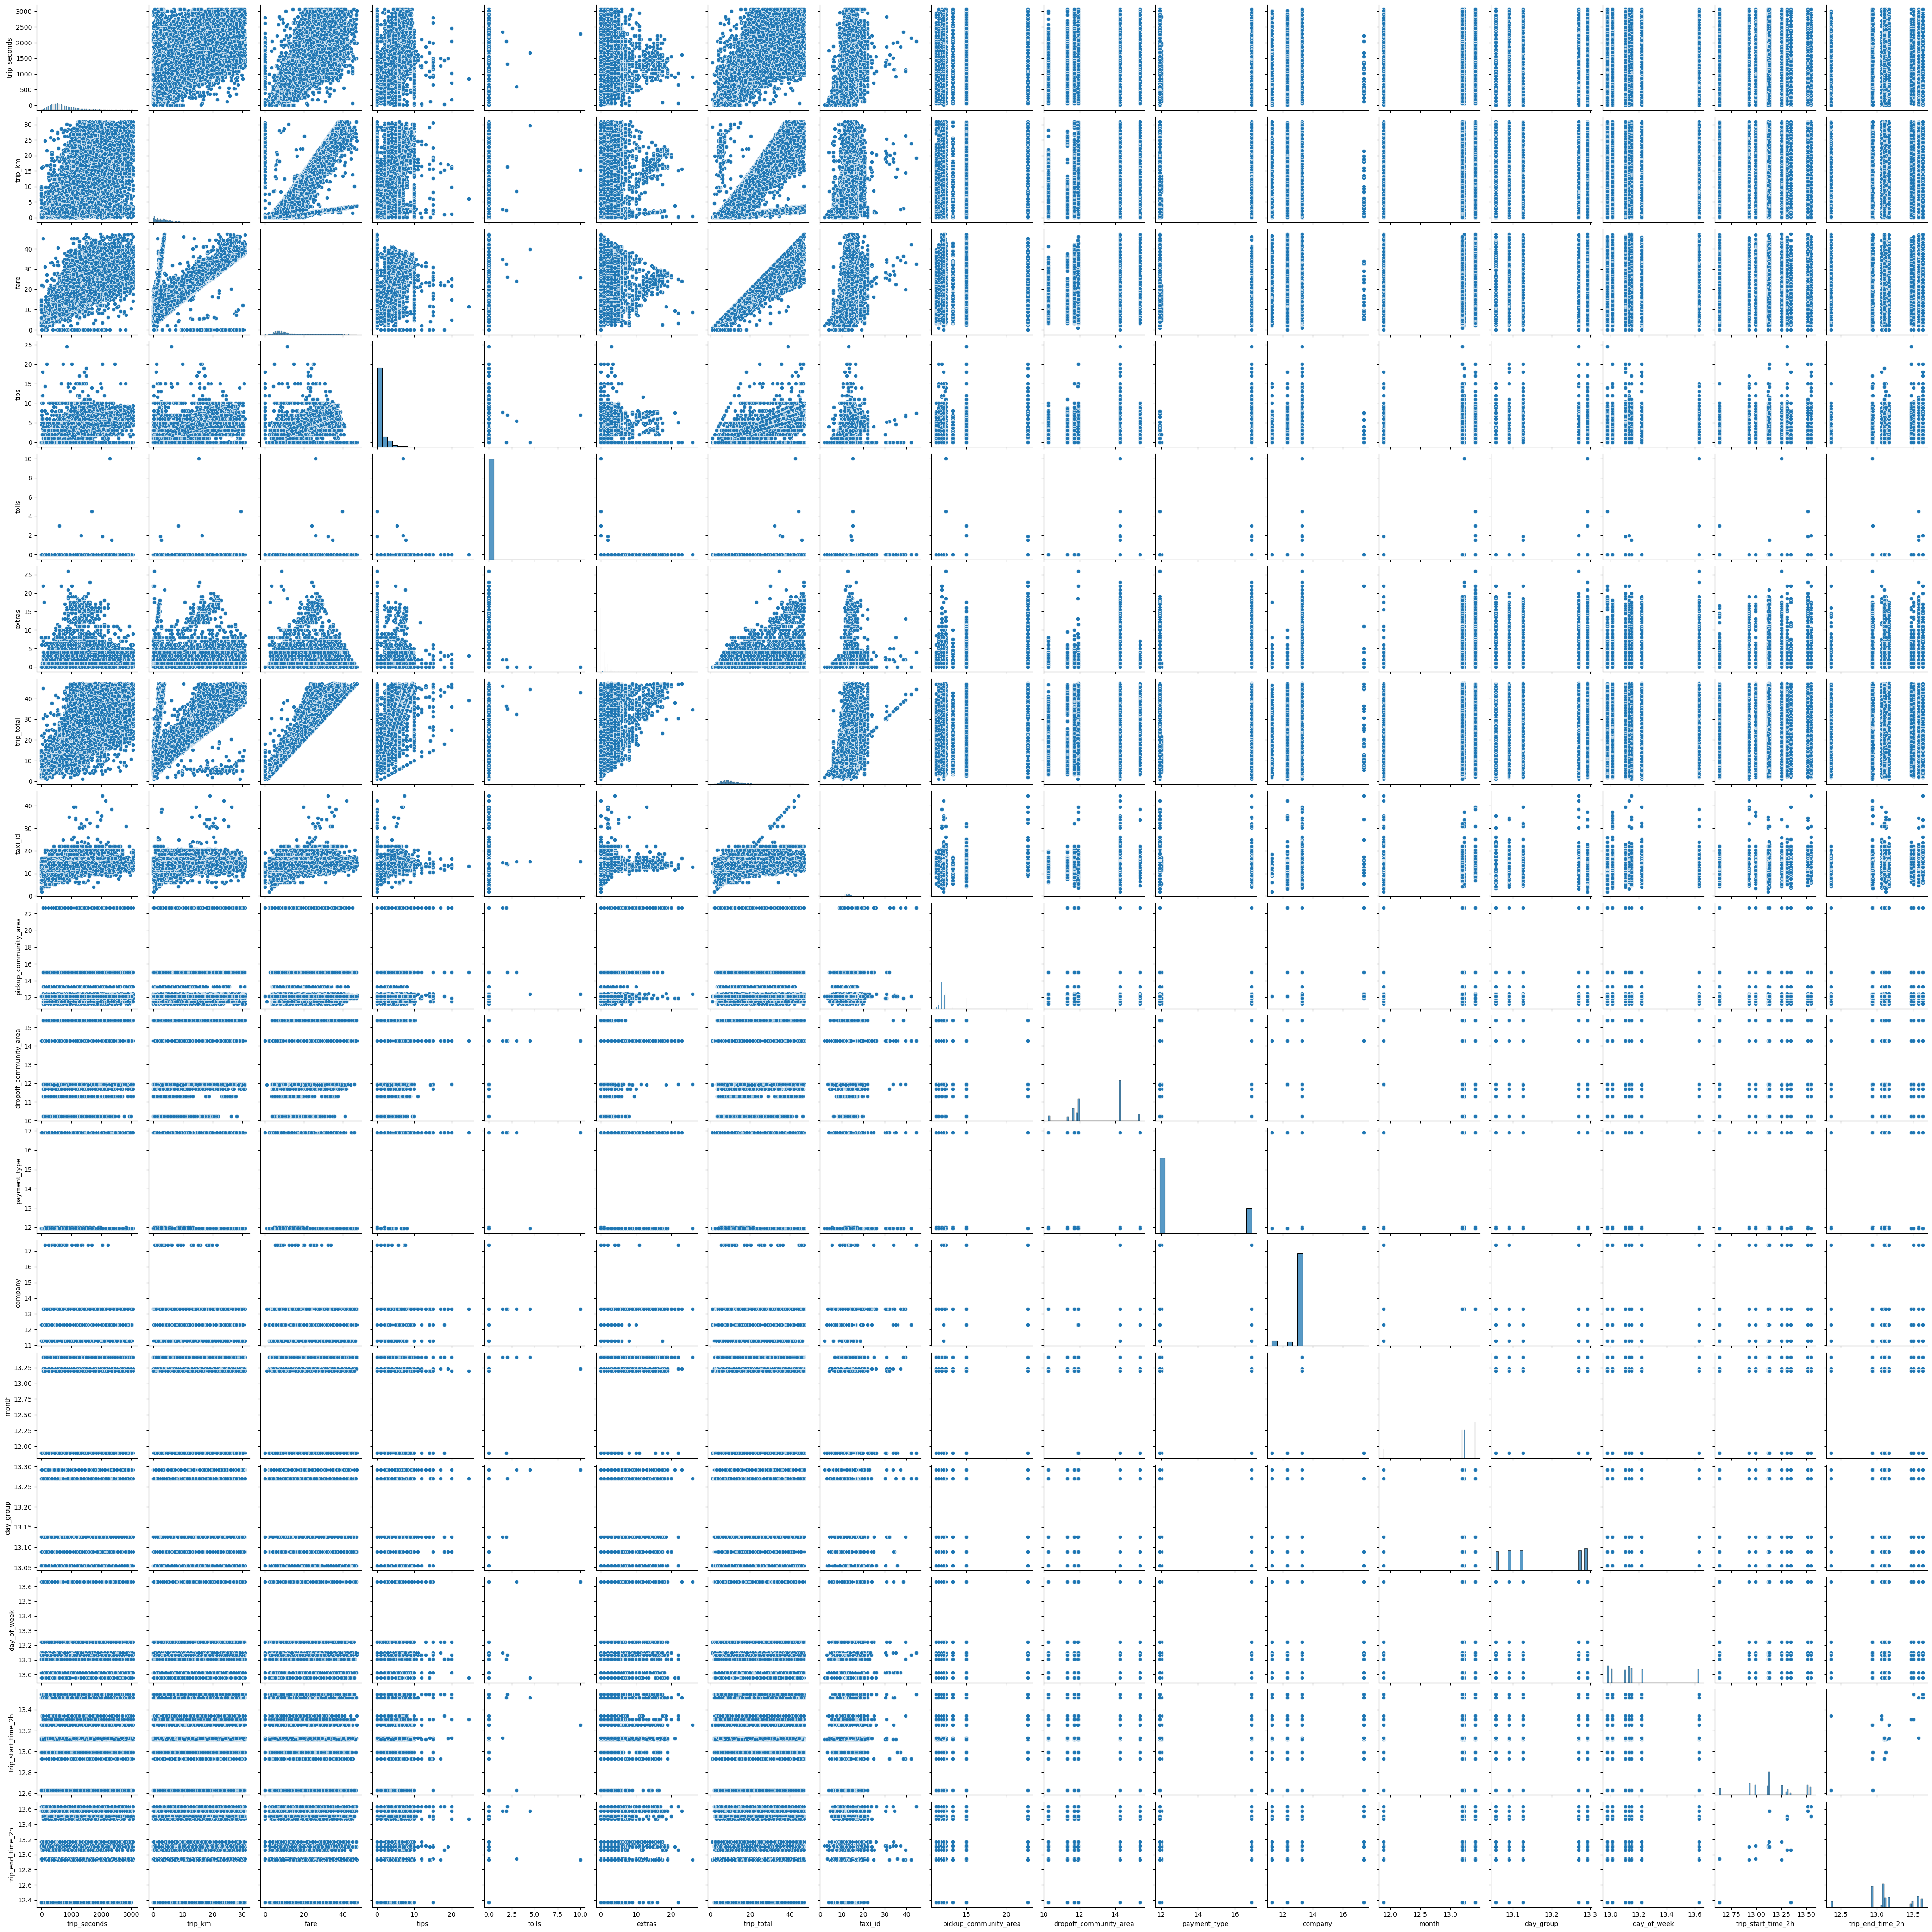

In [50]:
# Zwizualizowanie siatki wykresów, którymi są wykresy rozrzutu (scatter plots) dla każdej pary zmiennych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
sns.pairplot(df_edited2_no_outl_encoded)
plt.show()

Na powyższych wykresach można dostrzec zależności występujące między zmiennymi numerycznymi zmodyfikowanego zbioru danych "taxi_dane.xlsx".

In [52]:
# Przeprowadzenie analizy korelacji Pearsona, Spearmana i Kendalla dla wszystkich par zmiennych zmodyfikowanego zbioru danych "taxi_dane.xlsx".
corr_pearson = df_edited2_no_outl_encoded.corr("pearson")
corr_spearman = df_edited2_no_outl_encoded.corr("spearman")
corr_kendall = df_edited2_no_outl_encoded.corr("kendall")

# Wyświetlenie wartości korelacji Pearsona.
corr_pearson

trip_seconds  trip_km  fare  tips  tolls  extras  \
trip_seconds                   1.000    0.699 0.867 0.258  0.014   0.277   
trip_km                        0.699    1.000 0.850 0.290  0.011   0.310   
fare                           0.867    0.850 1.000 0.298  0.015   0.357   
tips                           0.258    0.290 0.298 1.000  0.018   0.145   
tolls                          0.014    0.011 0.015 0.018  1.000  -0.002   
extras                         0.277    0.310 0.357 0.145 -0.002   1.000   
trip_total                     0.841    0.836 0.976 0.458  0.021   0.478   
taxi_id                        0.239    0.193 0.280 0.092  0.010   0.192   
pickup_community_area          0.400    0.459 0.506 0.189  0.004   0.471   
dropoff_community_area         0.172    0.269 0.236 0.072  0.006   0.116   
payment_type                   0.101    0.110 0.114 0.782  0.008   0.060   
company                        0.076   -0.008 0.043 0.068  0.002   0.090   
month                          0.071   -0.009 0.037 0.061  0.001   0.088   
day_group                      0.020    0.009 0.014 0.015  0.006  -0.002   
day_of_week                   -0.008    0.040 0.031 0.003  0.007   0.050   
trip_start_time_2h            -0.033    0.044 0.035 0.018  0.003   0.089   
trip_end_time_2h              -0.006    0.050 0.047 0.027  0.001   0.098   

                        trip_total  taxi_id  pickup_community_area  \
trip_seconds                 0.841    0.239                  0.400   
trip_km                      0.836    0.193                  0.459   
fare                         0.976    0.280                  0.506   
tips                         0.458    0.092                  0.189   
tolls                        0.021    0.010                  0.004   
extras                       0.478    0.192                  0.471   
trip_total                   1.000    0.288                  0.542   
taxi_id                      0.288    1.000                  0.270   
pickup_community_area        0.542    0.270                  1.000   
dropoff_community_area       0.235   -0.094                  0.197   
payment_type                 0.247    0.048                  0.054   
company                      0.062    0.263                  0.091   
month                        0.056    0.236                  0.090   
day_group                    0.015   -0.002                  0.004   
day_of_week                  0.035    0.026                  0.030   
trip_start_time_2h           0.046    0.035                  0.042   
trip_end_time_2h             0.060    0.042                  0.044   

                        dropoff_community_area  payment_type  company  month  \
trip_seconds                             0.172         0.101    0.076  0.071   
trip_km                                  0.269         0.110   -0.008 -0.009   
fare                                     0.236         0.114    0.043  0.037   
tips                                     0.072         0.782    0.068  0.061   
tolls                                    0.006         0.008    0.002  0.001   
extras                                   0.116         0.060    0.090  0.088   
trip_total                               0.235         0.247    0.062  0.056   
taxi_id                                 -0.094         0.048    0.263  0.236   
pickup_community_area                    0.197         0.054    0.091  0.090   
dropoff_community_area                   1.000         0.012   -0.243 -0.240   
payment_type                             0.012         1.000    0.064  0.065   
company                                 -0.243         0.064    1.000  0.864   
month                                   -0.240         0.065    0.864  1.000   
day_group                                0.022         0.012   -0.014 -0.016   
day_of_week                             -0.001        -0.008    0.017  0.009   
trip_start_time_2h                       0.098         0.003    0.056  0.052   
trip_end_time_2h                  

In [53]:
# Wyświetlenie wartości korelacji Spearmana.
corr_spearman

trip_seconds  trip_km  fare  tips  tolls  extras  \
trip_seconds                   1.000    0.655 0.919 0.145  0.010   0.214   
trip_km                        0.655    1.000 0.744 0.125  0.007   0.155   
fare                           0.919    0.744 1.000 0.156  0.013   0.224   
tips                           0.145    0.125 0.156 1.000  0.011   0.060   
tolls                          0.010    0.007 0.013 0.011  1.000   0.001   
extras                         0.214    0.155 0.224 0.060  0.001   1.000   
trip_total                     0.889    0.718 0.967 0.316  0.014   0.339   
taxi_id                        0.213    0.114 0.239 0.050  0.012   0.162   
pickup_community_area          0.247    0.242 0.291 0.035  0.010   0.140   
dropoff_community_area         0.126    0.232 0.155 0.008  0.007   0.037   
payment_type                   0.115    0.101 0.126 0.935  0.011   0.041   
company                        0.092   -0.073 0.057 0.077  0.002   0.136   
month                          0.050    0.007 0.029 0.058  0.004   0.063   
day_group                      0.018    0.006 0.013 0.018  0.006  -0.014   
day_of_week                   -0.006    0.025 0.013 0.005  0.002   0.006   
trip_start_time_2h            -0.036    0.029 0.015 0.007  0.004   0.130   
trip_end_time_2h              -0.018    0.043 0.033 0.013  0.004   0.130   

                        trip_total  taxi_id  pickup_community_area  \
trip_seconds                 0.889    0.213                  0.247   
trip_km                      0.718    0.114                  0.242   
fare                         0.967    0.239                  0.291   
tips                         0.316    0.050                  0.035   
tolls                        0.014    0.012                  0.010   
extras                       0.339    0.162                  0.140   
trip_total                   1.000    0.248                  0.286   
taxi_id                      0.248    1.000                  0.145   
pickup_community_area        0.286    0.145                  1.000   
dropoff_community_area       0.150   -0.120                  0.161   
payment_type                 0.282    0.042                  0.026   
company                      0.079    0.202                  0.016   
month                        0.041    0.070                  0.007   
day_group                    0.011   -0.010                 -0.002   
day_of_week                  0.011    0.015                  0.016   
trip_start_time_2h           0.036    0.018                  0.018   
trip_end_time_2h             0.053    0.012                  0.019   

                        dropoff_community_area  payment_type  company  month  \
trip_seconds                             0.126         0.115    0.092  0.050   
trip_km                                  0.232         0.101   -0.073  0.007   
fare                                     0.155         0.126    0.057  0.029   
tips                                     0.008         0.935    0.077  0.058   
tolls                                    0.007         0.011    0.002  0.004   
extras                                   0.037         0.041    0.136  0.063   
trip_total                               0.150         0.282    0.079  0.041   
taxi_id                                 -0.120         0.042    0.202  0.070   
pickup_community_area                    0.161         0.026    0.016  0.007   
dropoff_community_area                   1.000         0.002   -0.244 -0.062   
payment_type                             0.002         1.000    0.064  0.052   
company                                 -0.244         0.064    1.000  0.494   
month                                   -0.062         0.052    0.494  1.000   
day_group                                0.013         0.015   -0.008 -0.028   
day_of_week                             -0.013         0.002    0.009 -0.030   
trip_start_time_2h                       0.089         0.003    0.071  0.018   
trip_end_time_2h                  

In [54]:
# Wyświetlenie wartości korelacji Kendalla.
corr_kendall

trip_seconds  trip_km  fare  tips  tolls  extras  \
trip_seconds                   1.000    0.512 0.781 0.120  0.009   0.169   
trip_km                        0.512    1.000 0.656 0.101  0.006   0.119   
fare                           0.781    0.656 1.000 0.128  0.011   0.175   
tips                           0.120    0.101 0.128 1.000  0.011   0.054   
tolls                          0.009    0.006 0.011 0.011  1.000   0.001   
extras                         0.169    0.119 0.175 0.054  0.001   1.000   
trip_total                     0.727    0.599 0.870 0.262  0.011   0.269   
taxi_id                        0.146    0.076 0.162 0.039  0.010   0.126   
pickup_community_area          0.181    0.176 0.212 0.029  0.009   0.112   
dropoff_community_area         0.093    0.173 0.114 0.006  0.006   0.030   
payment_type                   0.095    0.083 0.103 0.892  0.011   0.039   
company                        0.076   -0.059 0.046 0.072  0.002   0.127   
month                          0.038    0.005 0.022 0.051  0.004   0.055   
day_group                      0.014    0.004 0.009 0.015  0.006  -0.012   
day_of_week                   -0.004    0.018 0.009 0.005  0.002   0.005   
trip_start_time_2h            -0.025    0.020 0.010 0.005  0.004   0.104   
trip_end_time_2h              -0.013    0.030 0.023 0.011  0.004   0.105   

                        trip_total  taxi_id  pickup_community_area  \
trip_seconds                 0.727    0.146                  0.181   
trip_km                      0.599    0.076                  0.176   
fare                         0.870    0.162                  0.212   
tips                         0.262    0.039                  0.029   
tolls                        0.011    0.010                  0.009   
extras                       0.269    0.126                  0.112   
trip_total                   1.000    0.169                  0.207   
taxi_id                      0.169    1.000                  0.102   
pickup_community_area        0.207    0.102                  1.000   
dropoff_community_area       0.110   -0.089                  0.129   
payment_type                 0.231    0.034                  0.022   
company                      0.064    0.163                  0.014   
month                        0.031    0.052                  0.005   
day_group                    0.008   -0.007                 -0.002   
day_of_week                  0.008    0.011                  0.013   
trip_start_time_2h           0.025    0.012                  0.013   
trip_end_time_2h             0.037    0.008                  0.014   

                        dropoff_community_area  payment_type  company  month  \
trip_seconds                             0.093         0.095    0.076  0.038   
trip_km                                  0.173         0.083   -0.059  0.005   
fare                                     0.114         0.103    0.046  0.022   
tips                                     0.006         0.892    0.072  0.051   
tolls                                    0.006         0.011    0.002  0.004   
extras                                   0.030         0.039    0.127  0.055   
trip_total                               0.110         0.231    0.064  0.031   
taxi_id                                 -0.089         0.034    0.163  0.052   
pickup_community_area                    0.129         0.022    0.014  0.005   
dropoff_community_area                   1.000         0.002   -0.218 -0.051   
payment_type                             0.002         1.000    0.063  0.048   
company                                 -0.218         0.063    1.000  0.452   
month                                   -0.051         0.048    0.452  1.000   
day_group                                0.010         0.014   -0.007 -0.023   
day_of_week                             -0.010         0.002    0.008 -0.024   
trip_start_time_2h                       0.069         0.003    0.060  0.015   
trip_end_time_2h                  

In [55]:
# Wypisanie korelacji Pearsona, Spearmana i Kendalla o wartości większej lub równej 0,3.
corr_pearson_triu = corr_pearson.where(np.triu(np.ones(corr_pearson.shape, dtype=bool), k=1)).stack().sort_values()
print("Wartości korelacji Pearsona większe lub równe 0,3: ") 
print(corr_pearson_triu[abs(corr_pearson_triu)>=0.3], '\n')

corr_spearman_triu = corr_spearman.where(np.triu(np.ones(corr_spearman.shape, dtype=bool), k=1)).stack().sort_values()
print("Wartości korelacji Spearmana większe lub równe 0,3: ")
print(corr_spearman_triu[abs(corr_spearman_triu)>=0.3], '\n')

corr_kendall_triu = corr_kendall.where(np.triu(np.ones(corr_kendall.shape, dtype=bool), k=1)).stack().sort_values()
print("Wartości korelacji Kendalla większe lub równe 0,3: ")
print(corr_kendall_triu[abs(corr_kendall_triu)>=0.3], '\n')

Wartości korelacji Pearsona większe lub równe 0,3: 
trip_km             extras                  0.310
fare                extras                  0.357
trip_seconds        pickup_community_area   0.400
tips                trip_total              0.458
trip_km             pickup_community_area   0.459
extras              pickup_community_area   0.471
                    trip_total              0.478
fare                pickup_community_area   0.506
trip_total          pickup_community_area   0.542
trip_seconds        trip_km                 0.699
tips                payment_type            0.782
trip_km             trip_total              0.836
trip_seconds        trip_total              0.841
trip_km             fare                    0.850
company             month                   0.864
trip_seconds        fare                    0.867
trip_start_time_2h  trip_end_time_2h        0.910
fare                trip_total              0.976
dtype: float64 

Wartości korelacji Spearmana wi

Większości powyższych wysokich korelacji można było się spodziewać, m.in.:
- fare - trip_total,
- trip_seconds - fare,
- trip_km - trip_total,
- trip_km - extras

Nie spodziewałem się jednak zależności między:
- company - month. Wynikać może ona z błędów w zmodyfikowanym zbiorze danych "taxi_dane.xlsx". Warto byłoby ją dokładniej sprawdzić.

In [57]:
# Standaryzacja wszystkich zmienynych zmodyfikowanego zbioru danych "taxi_dane.xlsx" w celu przygotowania ich do prostej regresji liniowej.
# Z prostej regresji liniowej usuwam także zmienną "fare", bo jest ona wysoko skorelowana ze zmienną objaśnianą "trip_total".
X, y = df_edited2_no_outl_encoded.drop(columns=["trip_total", "fare"]), df_edited2_no_outl_encoded["trip_total"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Przygotowanie zbioru danych do przeprowadzenia prostej regresji liniowej, która pomoże określić, które zmienne mają statystycznie istotny wpływ na zmienną "trip_total", która najbardziej mnie interesuje.
df_X_scaled.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

dfhead10_dftail10_dftypes(df_X_scaled)

trip_seconds  trip_km     tips    tolls   extras  taxi_id  \
Column types      float64  float64  float64  float64  float64  float64   
0                   2.015   -0.515   -0.451   -0.007    3.986    0.529   
1                   0.252    1.189   -0.451   -0.007   -0.503   -0.006   
2                   0.252    1.608   -0.451   -0.007   -0.503    0.680   
3                   1.662   -0.776   -0.451   -0.007    0.313    0.878   
4                  -0.336    0.011   -0.451   -0.007   -0.503   -0.270   
5                  -1.394   -0.879   -0.451   -0.007   -0.503   -0.826   
6                  -0.571    0.404   -0.451   -0.007   -0.503    0.680   
7                  -0.806   -0.015    0.844   -0.007   -0.503   -0.826   
8                  -0.454   -0.842   -0.451   -0.007   -0.503    0.367   
9                  -0.689    0.430   -0.451   -0.007   -0.503   -1.047   
87802               1.192    2.314    4.309   -0.007    2.761    0.619   
87803               0.134   -0.826   -0.451   -0.007   -0.503    0.619   
87804               0.016   -0.617    0.844   -0.007   -0.503    0.619   
87805              -0.689   -0.695    0.197   -0.007   -0.503    0.619   
87806              -0.336   -0.591   -0.451   -0.007   -0.503    0.619   
87807               1.074   -0.120    1.460   -0.007    0.313    0.619   
87808               0.839    2.576    4.439   -0.007    2.761    0.619   
87809              -0.640   -0.599    0.844   -0.007   -0.503   -2.795   
87810              -1.041   -0.695    0.844   -0.007    0.313    0.897   
87811               0.132   -0.452   -0.451   -0.007   -0.503   -2.795   

             pickup_community_area dropoff_community_area payment_type  \
Column types               float64                float64      float64   
0                           -0.253                  0.886       -0.575   
1                           -0.210                 -0.733       -0.575   
2                           -0.253                  1.635       -0.575   
3                           -0.421                 -0.883       -0.575   
4                           -0.205                 -0.718       -0.575   
5                           -0.560                 -0.733       -0.575   
6                           -0.421                 -0.733       -0.575   
7                           -0.205                 -0.733        1.741   
8                           -0.210                 -0.883       -0.575   
9                           -0.560                 -0.718       -0.575   
87802                       -0.323                  0.886        1.741   
87803                       -0.323                  0.886       -0.575   
87804                       -0.323                  0.886        1.741   
87805                       -0.323                  0.886       -0.575   
87806                       -0.323                  0.886       -0.575   
87807                       -0.323                  0.886        1.741   
87808                       -0.323                  0.886        1.741   
87809                       -0.323                  0.886        1.741   
87810                       -0.323                  0.886        1.741   
87811                       -0.323                  0.886       -0.575   

              company    month day_group day_of_week trip_start_time_2h  \
Column types  float64  float64   float64     float64            float64   
0               0.275    0.604     1.262      -0.777              0.601   
1               0.275    0.604     1.262      -0.777              0.601   
2               0.275    0.604     1.262      -0.777              0.601   
3               0.275    0.604     1.262      -0.777              0.601   
4               0.275    0.604     1.262      -0.777              0.601   
5               0.275    0.604     1.262      -0.777              0.601   
6               0.275    0.604     1.262      -0.777              0.601   
7               0.275    0.604     1.262      -0.777              0.601   
8    

In [58]:
# Przeprowadzenie prostej regresji liniowej, aby określić, które zmienne mają statystycznie istotny wpływ na zmienną "trip_total", która najbardziej mnie interesuje.

# Zastosowany test statystyczny: Jeśli wartość p (P>|t|) jest większa od poziomu istotności 𝛼=0.05, to nie mamy podstaw do odrzucenia hipotezy zerowej. 
# Oznacza to, że zmienna nie jest istotna statystycznie i można rozważyć jej usunięcie ze zbioru danych. 
# W przeciwnym wypadku, jeśli wartość p jest mniejsza lub równa 0.05, zmienna jest statystycznie istotna i powinna zostać uwzględniona w analizie.
df_X_scaled = sm.add_constant(df_X_scaled) # Dodanie stałej do modelu.

model = sm.OLS(y, df_X_scaled)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             trip_total   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 5.797e+04
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:34:37   Log-Likelihood:            -2.0959e+05
No. Observations:               87812   AIC:                         4.192e+05
Df Residuals:                   87796   BIC:                         4.194e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     13

Wszystkie zmienne w powyższym modelu mają wartość p mniejszą niż 0,05, co oznacza, że one wszystkie mają istotny statystycznie wpływ na zmienną "trip_total".

Gdyby jednak którakolwiek ze zmiennych miałaby wartość p większą niż 0,05, wskazywałoby to na brak statystycznej istotności tej zmiennej. W takim przypadku najpierw usunąłbym zmienną z najwyższą wartością p i stworzył nowy model regresji liniowej bez tej zmiennej. Proces ten powtarzałbym, stopniowo eliminując zmienne z najwyższymi wartościami p, aż uzyskałbym model, w którym wszystkie pozostałe zmienne byłyby statystycznie istotne.

Ze względu na ograniczony czas, nie przeprowadziłem bardziej zaawansowanych testów weryfikujących wpływ zmiennych na "trip_total". Można było dodatkowo:
- Sprawdzić, które zmienne są istotne statystycznie, kiedy nie są standaryzowane lub gdy są standaryzowane za pomocą innej metody.
- Przeprowadzić test wielomianowy, aby ocenić istotność statystyczną zmiennych w modelu nieliniowym.

Wnioski dotyczące mojego sposobu analizy zbioru danych "taxi_dane.xlsx":
Ze względu na ograniczony czas, nie przeprowadziłem dokładniejszej analizy tego zbioru. W dalszych etapach analizy mógłbym wtedy rozważyć:
- Wyciągnięcie wniosków ze skrajnych obserwacji tego zbioru, np. dotyczące tego, czy osoby jadące w długą trasę taksówką płacą głównie gotówką.
- Policzenie zarobków taksówkarzy przynależących do różnych firm lub jeżdżących tylko w konkretnych regionach.
- Wyliczenie pomiędzy którymi regionami najbardziej opłaca się kursować taksówkarzom.
- Stworzenie dla zmiennych kategorycznych wykresów skrzypcowych, aby lepiej zrozumieć ich rozkład i zależności.
- Przeprowadzenie analizy głównych składowych (PCA) dla wszystkich zmiennych tego zbioru, aby zredukować wymiarowość danych i zidentyfikować najważniejsze czynniki.
- Przeprowadzenie klasteryzacji, co mogłoby pomóc w grupowaniu podobnych obserwacji i wyciągnięciu z tego wniosków.
- Przeprowadzenie dodatkowych testów statystycznych dla modelu prostej regresji liniowej, takich jak testy na normalność reszt, homoskedastyczność czy autokorelację, aby skontrolować prawidłowość tego modelu.

Ogólne wnioski analizy tego zbioru:
- Regiony, w których najczęściej zamawiane są taksówki i które są głównymi celami przejazdów to: 8 i 'out of town'.
- Według mnie rok i miesiąc w tym zbiorze zawierają stronnicze wartości. Zależności między nimi i innymi zmiennymi mogą być niepewne.
- Klienci płacą głównie gotówką za przejazd.
- Taksówkarze zazwyczaj nie przynależą do żadnej firmy lub jest ona nieznana.
- Największe zapotrzebowanie na taksówki występuje na początku miesiąca, w piątki i soboty oraz w godzinach popołudniowych i wieczornych.
- Bardzo rzadko, kiedykolwiek ktoś płaci napiwek taksówkarzowi lub opłatę drogową bądź dodatkową za przejazd.
- Zbiór zawiera wiele wartości odstających, które mogą kryć dodatkowe przydatne informacje.
- Całkowity koszt przejazdu taksówkarza jest bardziej uzależniony od liczby przejechanych kilometrów niż od czasu trwania przejazdu.
- Większość oczekiwanych zależności dotyczących zmiennej "trip_total" została potwierdzona przez analizę korelacji.

Moje rekomendacje dla taksówkarzy zostały napisane powyżej pod wykresami kolumnowi zmiennych kategorycznych. Nic do nich bym nie dodał. Poniżej wklejam owe rekomendacje:
Aby taksówkarzowi udało się w analizowanym okresie przewieźć jak największą ilość klientów prawdopodobnie:
- Powinien czekać na nich w regionie 8, 32, 6 lub "out of town". Najlepiej czekać na nich w regionie 8.
- Powinien być gotowy na przejazd do regionu: "out of town", 8, 33 i 3. Z perspektywy taksówkarza najkorzystniej by było, gdyby czekał on na terenie regionu 8 i przyjmował on tylko oferty, gdy klient potrzebuje dojechać do regionu 'out of town' lub 8.
- Powinien umożliwiać klientowi płatność gotówką i kartą.
- Może, ale nie musi przynależeć do jakiejś firmy. Dane sugerują, że nie powinien przynależeć do żadnej firmy, ponieważ takie firmy mogą potencjalnie pobierać jakieś odsetki od całkowitej kwoty opłaconej przez klienta za przejazd taksówką. Ta informacja może być jednak myląca, gdyż twórcom tego zbioru mogło się po prostu nie udać pozyskać informacji o przynależności poszczególnych taksówkarzy do firm.
- Powinien być do częstej dyspozycji w październiku, listopadzie i grudniu. Tą informacją bym się natomiast nie sugerował, bo może wynikać ona ze stronniczości wartości kolumny "month".
- Powinien być do dłuższej dyspozycji na początku miesiąca i potencjalnie do krótszej dyspozycji pod koniec miesiąca, aby sobie w te dni dłużej odpoczywać.
- Powinien być do dyspozycji między 16:00, a 20:00. Z perspektywy taksówkarza najkorzystniej by było, gdyby pracował on po 8 godzin dziennie między 14:00, a 22:00, czyli bardziej w godzinach popołudniowych i wieczornych, niż porannych.

Za wszelkie błędy lub pominięcia w analizach, które mogły się pojawić w tym pliku, przepraszam.